# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goal Of The Case Study

There are quite a few goals for this case study:


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##  EDA

### Step 1 Load Data

In [2511]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


from sklearn.metrics import f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn import metrics


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2512]:
# import data
lead_df = pd.read_csv('Leads.csv')

In [2513]:
# check dataset
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

#### Inspect the Data

Observation : Multiple values are not selected

In [2514]:
# data shape
lead_df.shape

(9240, 37)

In [2515]:
# datatype
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Note : We have missing value 

In [2516]:
# describe the dat.
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

### Step 2 Data Cleaning

In [2517]:
# Treatment of not selected data.
lead_df = lead_df.replace('Select',np.nan)

In [2518]:
# verify
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                      NaN                                NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No             NaN     NaN                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                      NaN                                NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No             NaN     NaN                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                                NaN                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

#### Missing Value Teatment

In [2519]:
# Checking for duplicates and dropping the entire duplicate row if any:-

lead_df.drop_duplicates(subset=None, inplace=True)

In [2520]:
# Checking for null values.
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [2521]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [2522]:
# dropping the columns with missing values greater than or equal to 39% .
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','City',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [2523]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Observation: Still we have 5 columns which has huge null values.

In [2524]:
# check columns data 
lead_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [2525]:
# Value count
lead_df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [2526]:
# visualize data
def missing_data(cl_nm):
    plt.figure(figsize=(17,5))
    sns.histplot(cl_nm)
    plt.xticks(rotation=90)
    

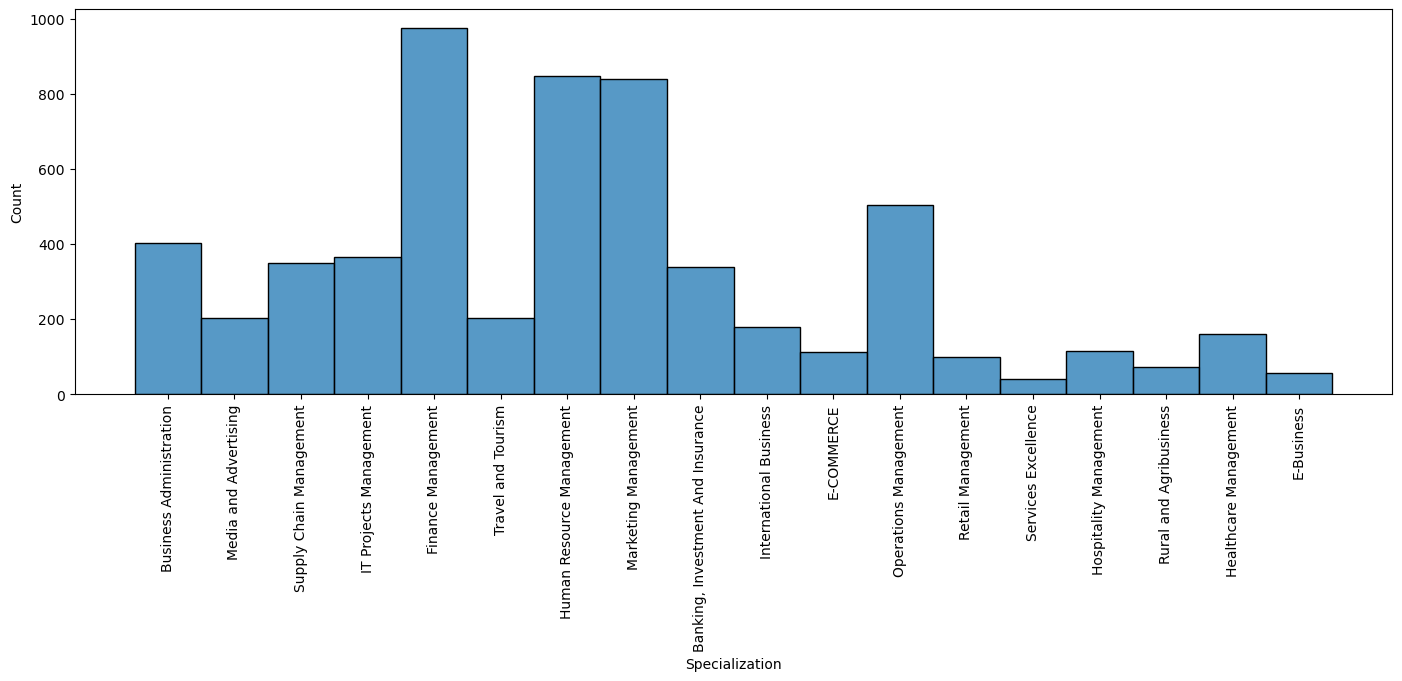

In [2527]:

missing_data(lead_df.Specialization)

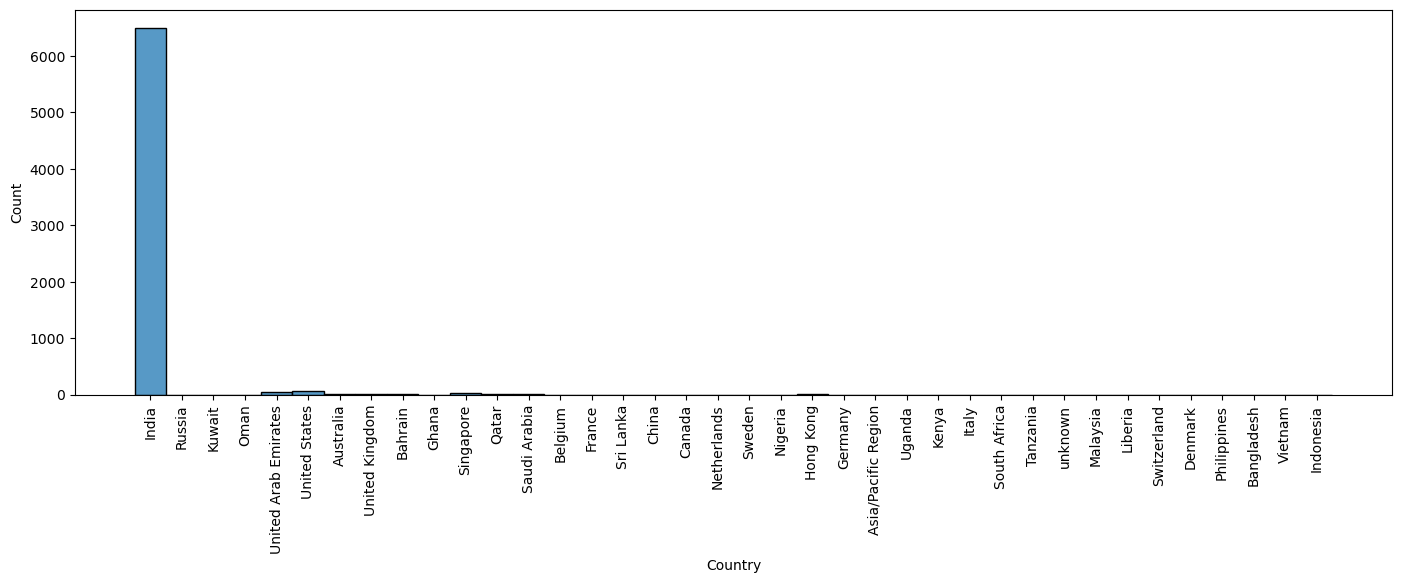

In [2528]:
missing_data(lead_df.Country)

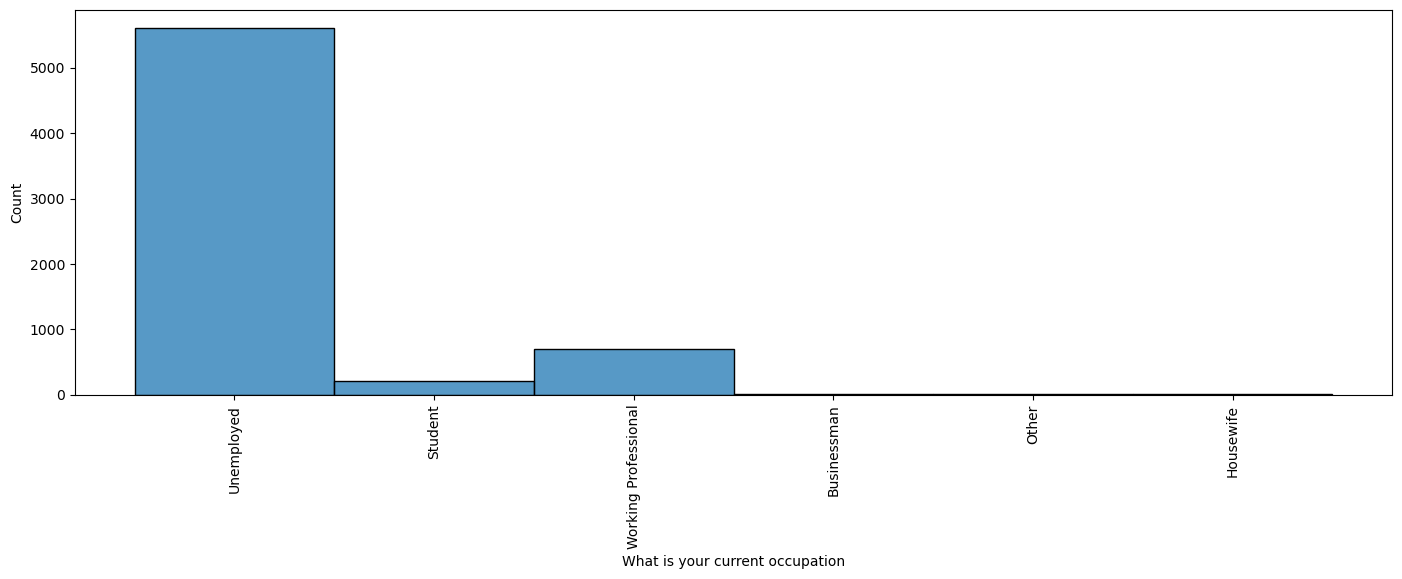

In [2529]:
missing_data(lead_df['What is your current occupation'])

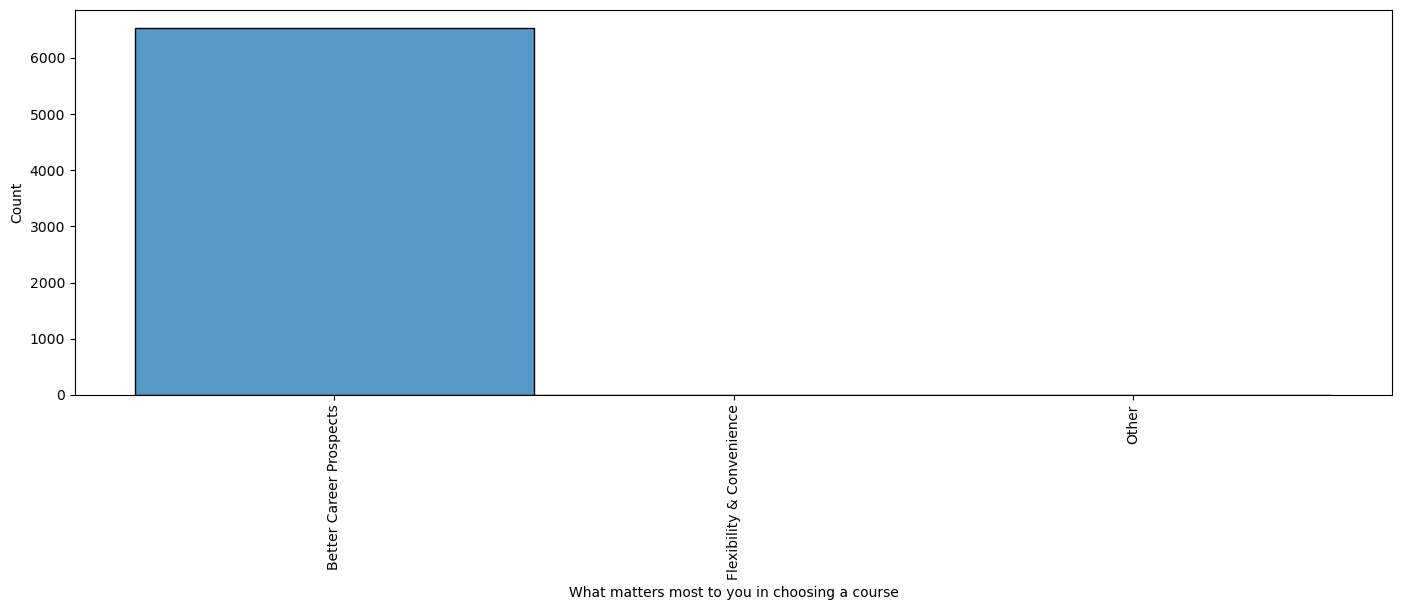

In [2530]:
missing_data(lead_df['What matters most to you in choosing a course'])

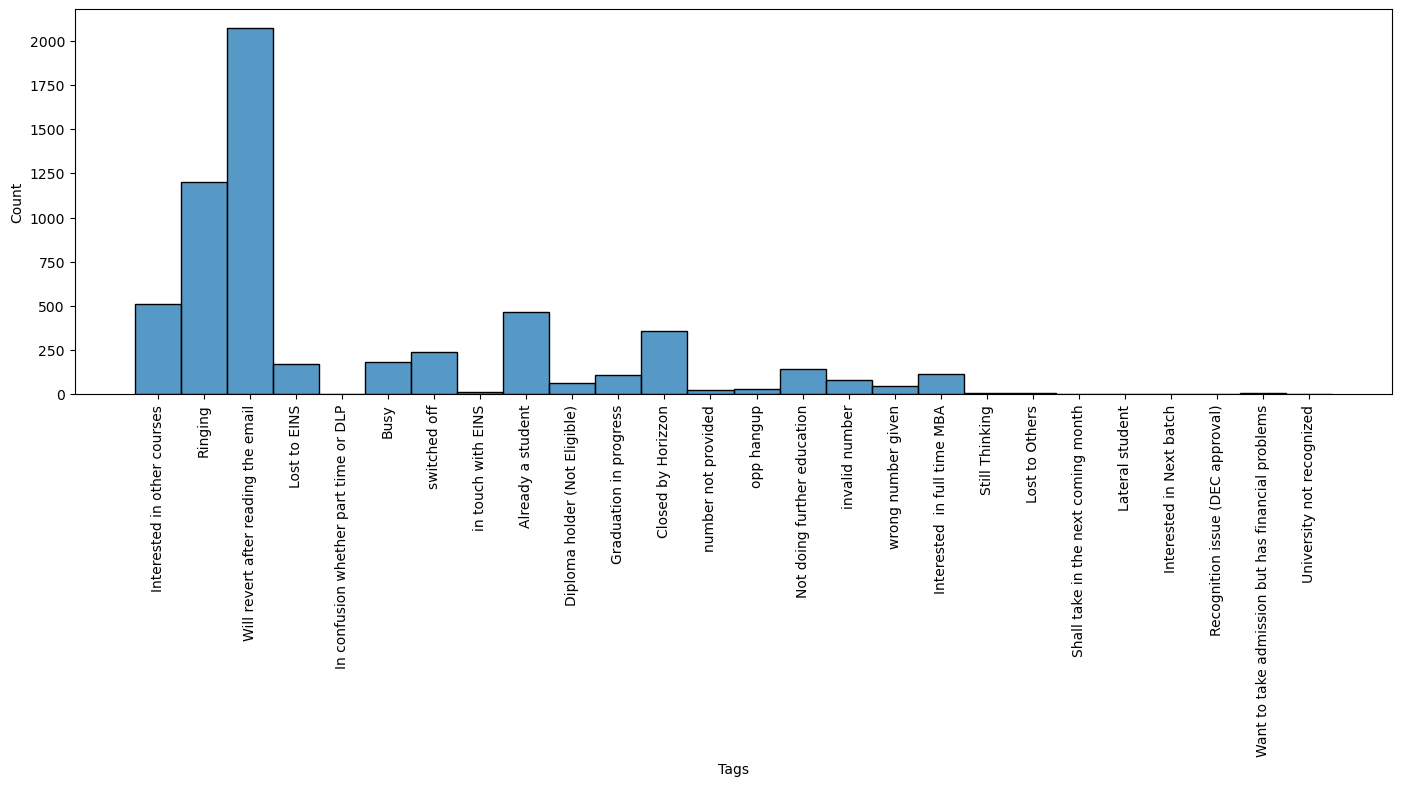

In [2531]:
missing_data(lead_df.Tags)

In [2532]:
# data shape
lead_df.shape

(9240, 29)

In [2533]:
# dropping columns
lead_df.drop(['Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
lead_df.shape

(9240, 26)

In [2534]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [2535]:
# check missing value 
missing_values_df = lead_df[lead_df['TotalVisits'].isnull()]
missing_values_df

Prospect ID  Lead Number    Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit Last Activity                     Specialization What is your current occupation Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
77    895d4905-f534-4f18-915b-8d239a72b5dc       659722  Lead Add Form  Welingak Website           No          No          1          NaN                         1096                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699       659710  Lead Add Form         Reference           No          No          1          NaN                          705                   NaN           NaN             Hospitality Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
81    277ad6a6-4565-4a18-a1ff-e46e03f22663       659705  Lead Add Form  Welingak Website           No          No          1          NaN                          346                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
88    68f496c2-0073-470f-9c3c-7fb48f060ce5       659631  Lead Add Form         Reference           No          No          1          NaN                         1007                   NaN           NaN          Human Resource Management                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
120   144807db-2895-4002-b52e-3eda79c22395       659283  Lead Add Form         Reference           No          No          1          NaN                         1111                   NaN           NaN               Marketing Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
...                                    ...          ...            ...               ...          ...         ...        ...          ...                          ...                   ...           ...                                ...                             ...    ...      ...               ...                ...       ...                   ...                     ...                                    ...                               ...                       ...                                      ...                                 

In [2536]:
missing_values_df = lead_df[lead_df['Last Activity'].isnull()]
missing_values_df

Prospect ID  Lead Number    Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit Last Activity                     Specialization What is your current occupation Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
77    895d4905-f534-4f18-915b-8d239a72b5dc       659722  Lead Add Form  Welingak Website           No          No          1          NaN                         1096                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699       659710  Lead Add Form         Reference           No          No          1          NaN                          705                   NaN           NaN             Hospitality Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
81    277ad6a6-4565-4a18-a1ff-e46e03f22663       659705  Lead Add Form  Welingak Website           No          No          1          NaN                          346                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
88    68f496c2-0073-470f-9c3c-7fb48f060ce5       659631  Lead Add Form         Reference           No          No          1          NaN                         1007                   NaN           NaN          Human Resource Management                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
120   144807db-2895-4002-b52e-3eda79c22395       659283  Lead Add Form         Reference           No          No          1          NaN                         1111                   NaN           NaN               Marketing Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
...                                    ...          ...            ...               ...          ...         ...        ...          ...                          ...                   ...           ...                                ...                             ...    ...      ...               ...                ...       ...                   ...                     ...                                    ...                               ...                       ...                                      ...                                 

In [2537]:
# removing missing values
lead_df = lead_df.dropna(subset='TotalVisits')
lead_df = lead_df.dropna(subset='Lead Source')

In [2538]:
# Imputing values as per the above observations/insights
    
lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna(value='Unemployed')
lead_df['Specialization']=lead_df['Specialization'].fillna(value='Others')

In [2539]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

#### Removing Unwanted Columns

These columns are of no use as they have only one category of response from customer and can be dropped:

In [2540]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns

cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']


lead_df.drop(cols_to_drop, axis = 1, inplace = True)

In [2541]:
lead_df.shape

(9074, 21)

NOTE: Columns such as:

* 'Prospect ID',
* 'Lead Number',
* 'Last Notable Activity'

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [2542]:
# Dropping Columns

lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [2543]:
lead_df.shape

(9074, 18)

In [2544]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

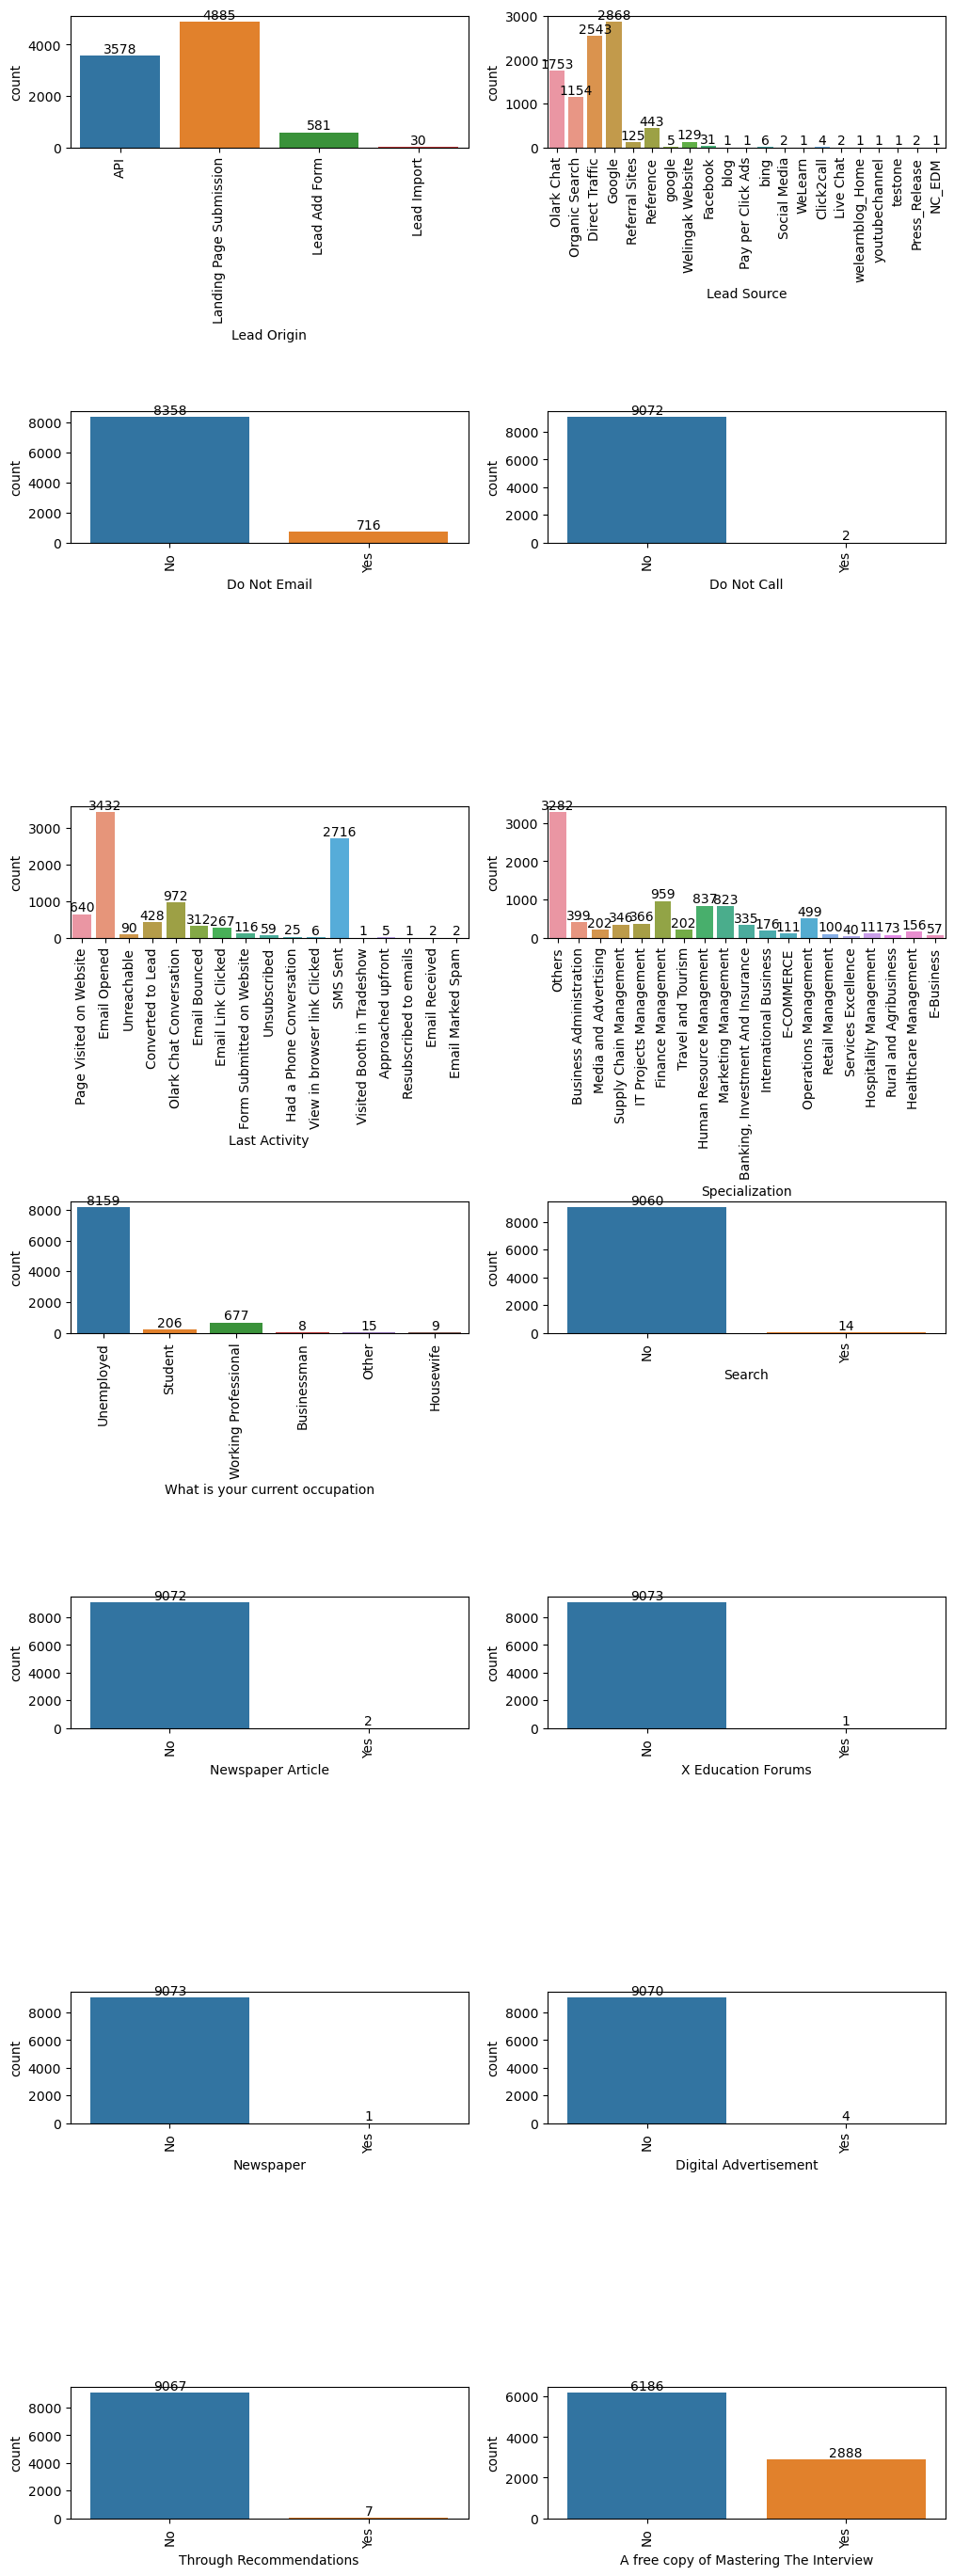

In [2545]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

NOTE: Following columns have data which is highly skewed :

* 'Do Not Call',
* 'Search',
* 'Newspaper Article',
* 'X Education Forums',
* 'Newspaper',
* 'Digital Advertisement',
* 'Through Recommendations'.

These columns will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [2546]:
# Dropping categorical columns with highly skewed data

lead_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",lead_df.shape)

After Drop:  (9074, 11)


#### Check Outliers

In [2547]:
# functions for ploting boxpolt

def get_outliers(data,columns):

    plt.figure(figsize=[20,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columns):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

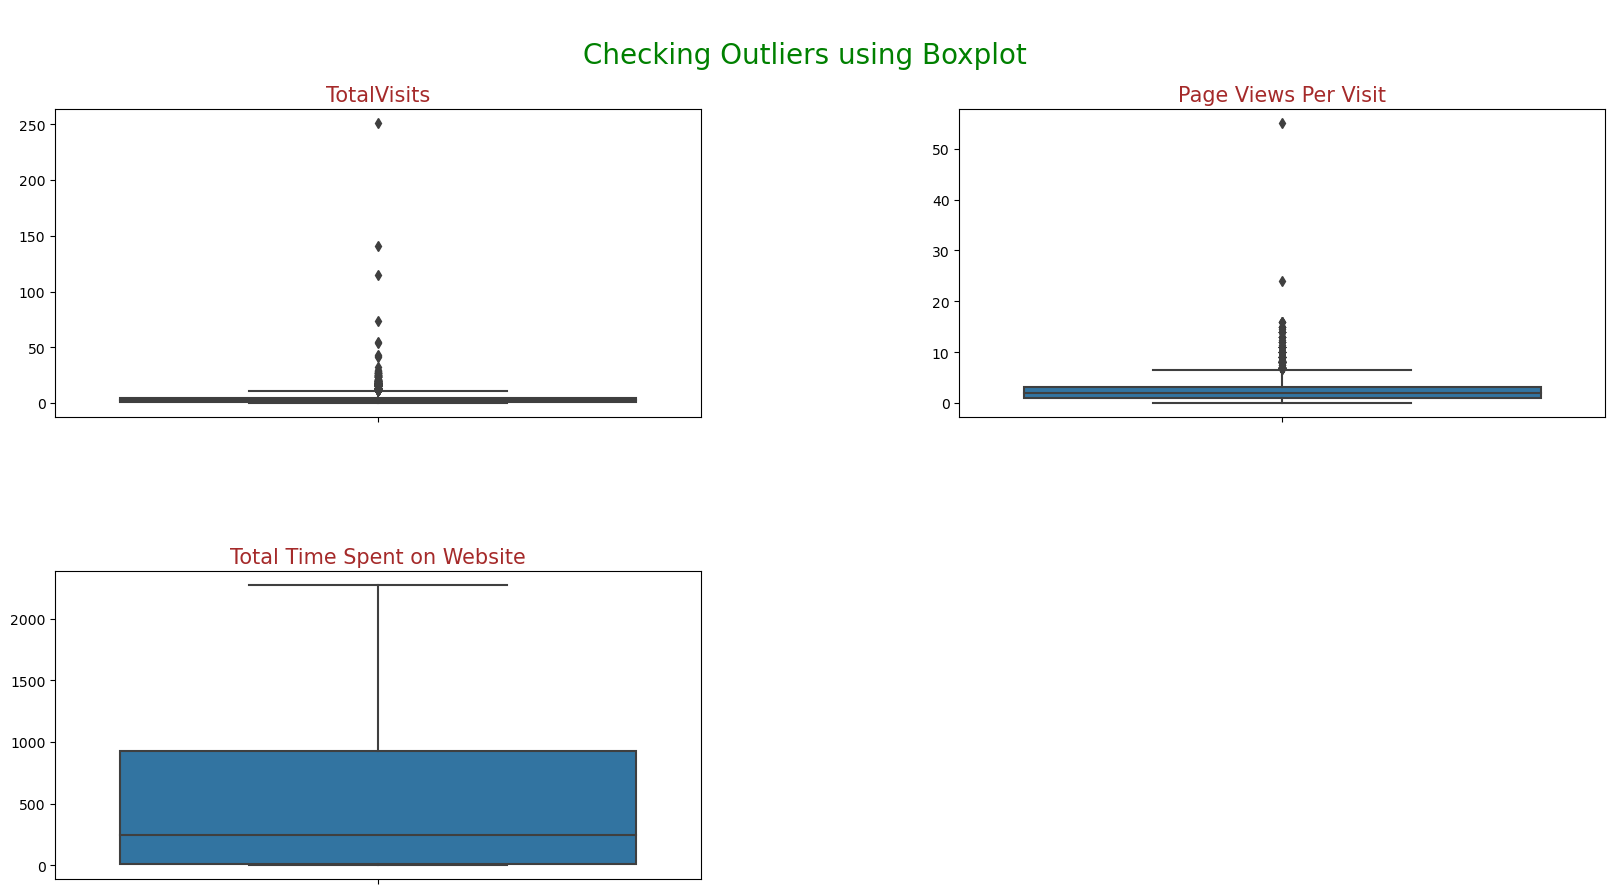

In [2548]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
get_outliers(lead_df,num_cols)

Observation : TotalVisits and PageViewsPerVista has outliers

#### Treatment of outliers

In [2549]:
# describe data in different percentiles.
lead_df.describe(percentiles=[.25,.50,.70,.75,.80,.90,.93,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000  9074.000000                  9074.000000           9074.000000
mean      0.378554     3.456028                   482.887481              2.370151
std       0.485053     4.858802                   545.256560              2.160871
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     1.000000                    11.000000              1.000000
50%       0.000000     3.000000                   246.000000              2.000000
70%       1.000000     4.000000                   693.000000              3.000000
75%       1.000000     5.000000                   922.750000              3.200000
80%       1.000000     5.000000                  1078.400000              4.000000
90%       1.000000     7.000000                  1373.000000              5.000000
93%       1.000000     8.000000                  1483.000000              5.000000
95%       1.000000    10.000000                  1557.000000              6.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [2550]:
# remove outliers at percentile 95%

lead_df = lead_df[(lead_df['TotalVisits'] <= 10) & (lead_df['Page Views Per Visit'] <= 7) & (lead_df['Total Time Spent on Website'] <= 1995)]
lead_df.describe()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8552.000000  8552.000000                  8552.000000           8552.000000
mean      0.374065     2.813962                   466.476146              2.142405
std       0.483909     2.368245                   536.900764              1.741052
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                     0.000000              0.000000
50%       0.000000     3.000000                   233.000000              2.000000
75%       1.000000     4.000000                   885.000000              3.000000
max       1.000000    10.000000                  1995.000000              7.000000

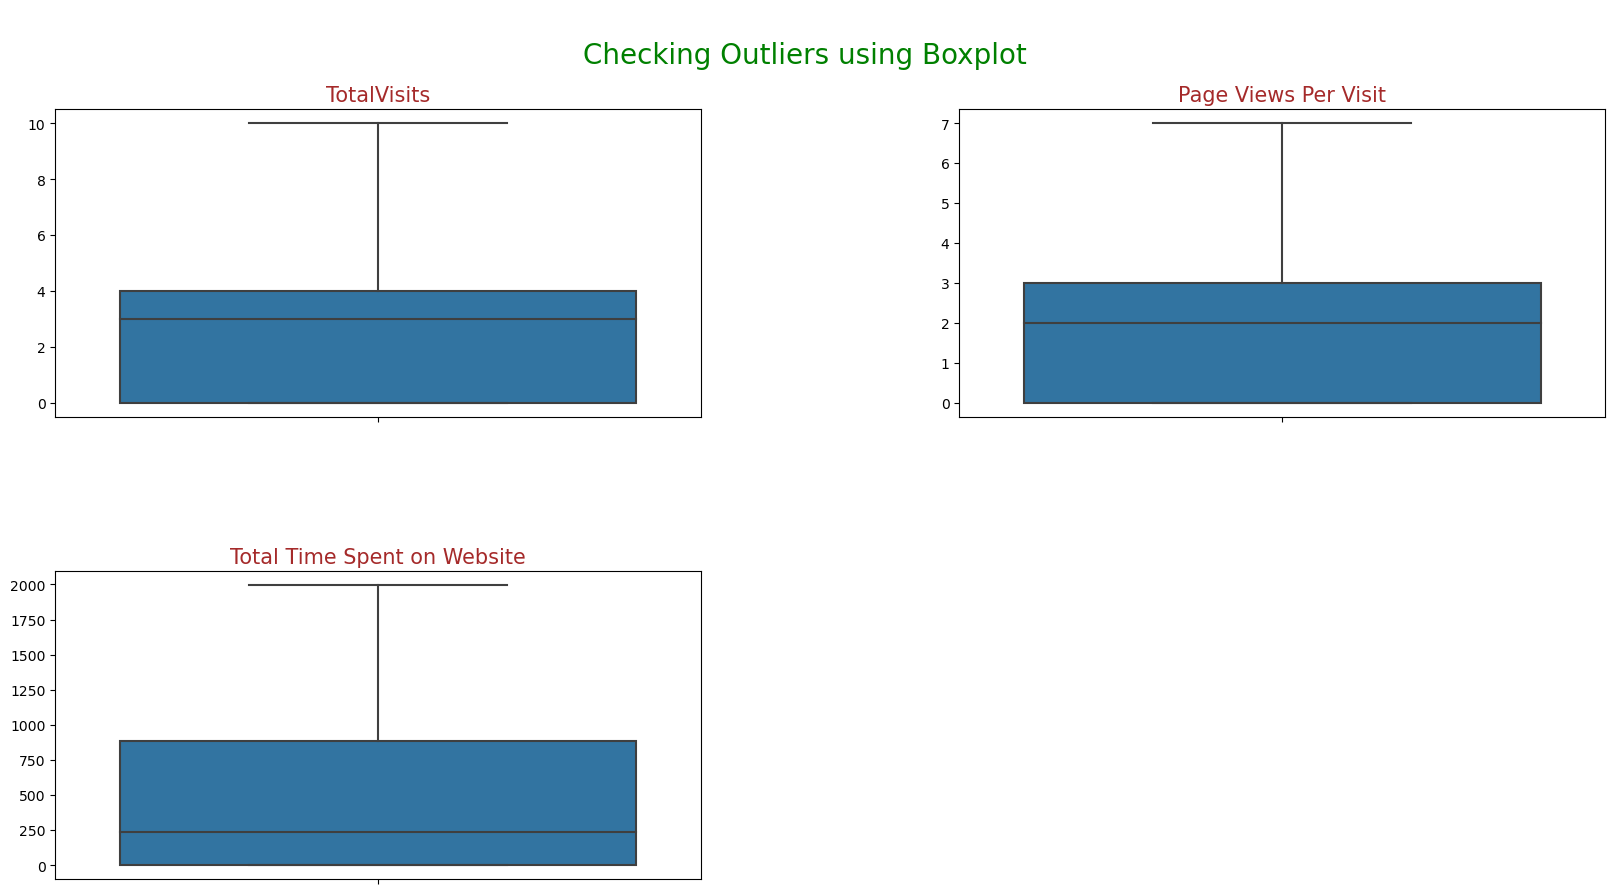

In [2551]:
# after treatment
get_outliers(lead_df,num_cols)

In [2552]:
# after outlier treatment detailed percentile values
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8552.000000  8552.000000                  8552.000000           8552.000000
mean      0.374065     2.813962                   466.476146              2.142405
std       0.483909     2.368245                   536.900764              1.741052
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                     0.000000              0.000000
50%       0.000000     3.000000                   233.000000              2.000000
75%       1.000000     4.000000                   885.000000              3.000000
95%       1.000000     7.000000                  1535.450000              5.000000
max       1.000000    10.000000                  1995.000000              7.000000

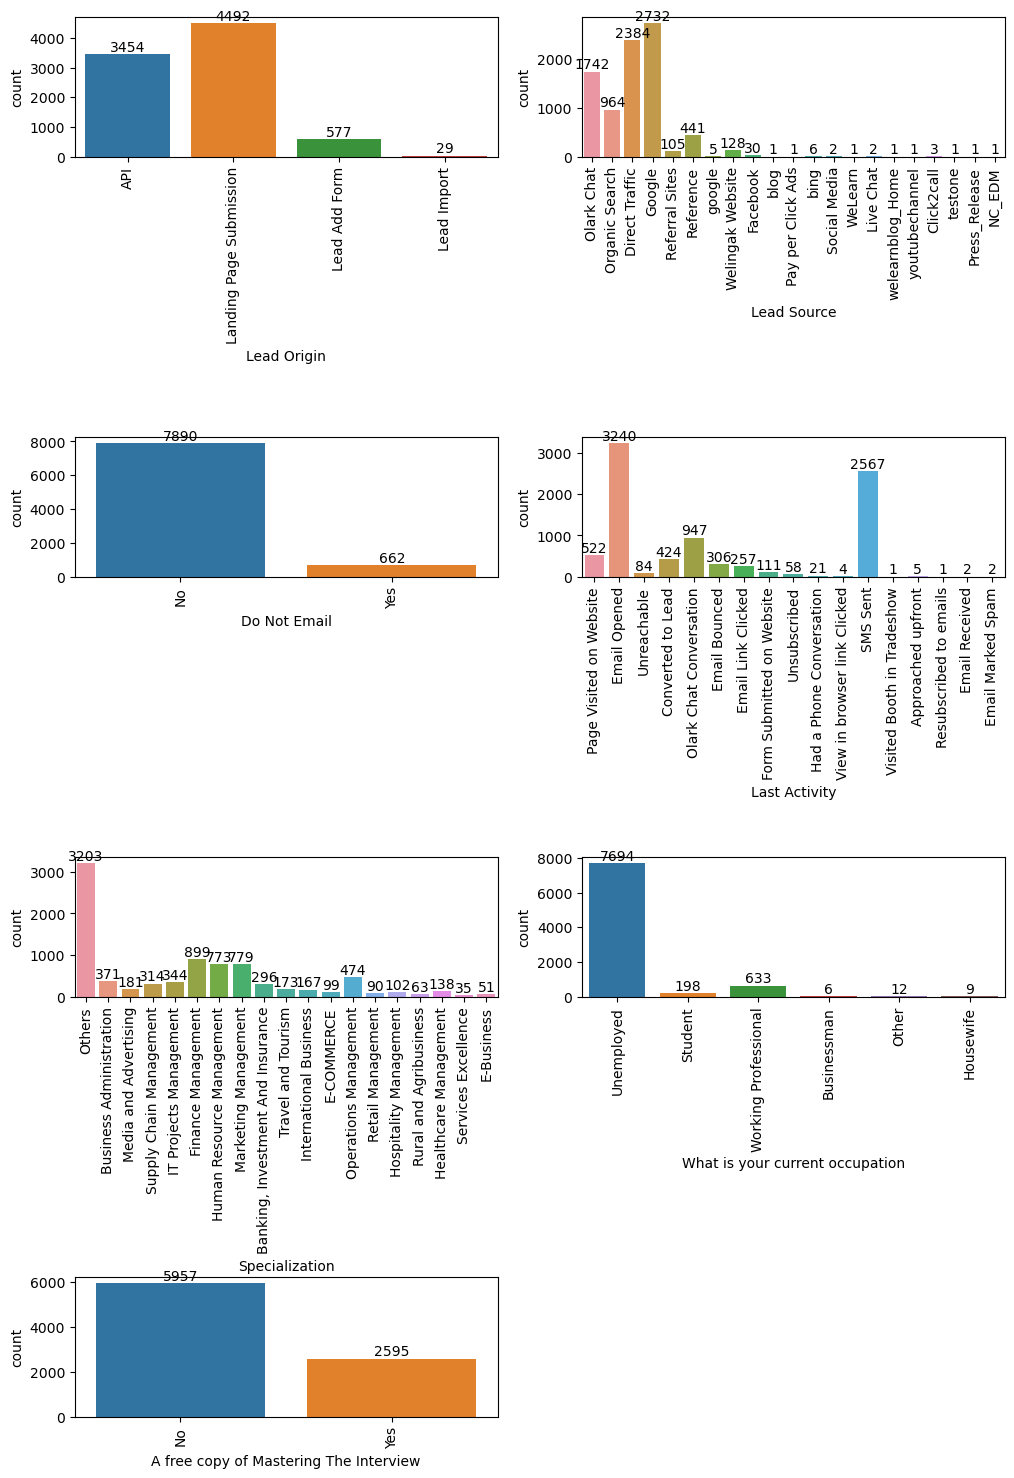

In [2553]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [2554]:
# Changing google to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google","Google")


# Grouping low frequency value levels to Others
lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [2555]:
# value_counts percentage after replace
lead_df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              32.004210
Direct Traffic      27.876520
Olark Chat          20.369504
Organic Search      11.272217
Reference            5.156688
Welingak Website     1.496726
Referral Sites       1.227783
Facebook             0.350795
Others               0.245557
Name: proportion, dtype: float64

In [2556]:
# Grouping low frequency value levels to Others 
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [2557]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8552 non-null   object 
 1   Lead Source                             8552 non-null   object 
 2   Do Not Email                            8552 non-null   object 
 3   Converted                               8552 non-null   int64  
 4   TotalVisits                             8552 non-null   float64
 5   Total Time Spent on Website             8552 non-null   int64  
 6   Page Views Per Visit                    8552 non-null   float64
 7   Last Activity                           8552 non-null   object 
 8   Specialization                          8552 non-null   object 
 9   What is your current occupation         8552 non-null   object 
 10  A free copy of Mastering The Interview  8552 non-null   object 
d

In [2558]:
# Renaming column name to "Interview_copy" from "A free copy of Mastering The Interview"
lead_df.rename(columns={'A free copy of Mastering The Interview': 'Interview Copy'}, inplace=True)

# Renaming column name to "occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead_df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

# Renaming column name to "Spend_Website" from "Total Time Spent on Website"
lead_df.rename(columns={'Total Time Spent on Website': 'Spend Website'}, inplace=True)

# Renaming column name to "Page_Visit" from "Page Views Per Visit"
lead_df.rename(columns={'Page Views Per Visit': 'Page Visit'}, inplace=True)

In [2559]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   object 
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 801.8+ KB


In [2560]:
# convert datatype od Do Not Email and Interview copy (Yes 1 / NO 0)


lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_df['Interview Copy'] = lead_df['Interview Copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [2561]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   int64  
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 801.8+ KB


### Step 3 Data Analysis

#### Univariate Analysis

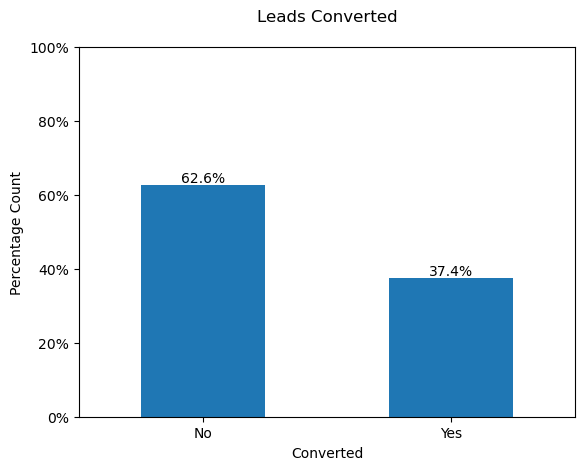

In [2562]:
ax =(100*lead_df["Converted"].value_counts(normalize=True)).plot.bar()


plt.title("Leads Converted\n")
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [2563]:
#List of categorical columns
cat_cols = ["Lead Origin","Occupation","Do Not Email",
            "Interview Copy","Lead Source","Last Activity","Specialization"]

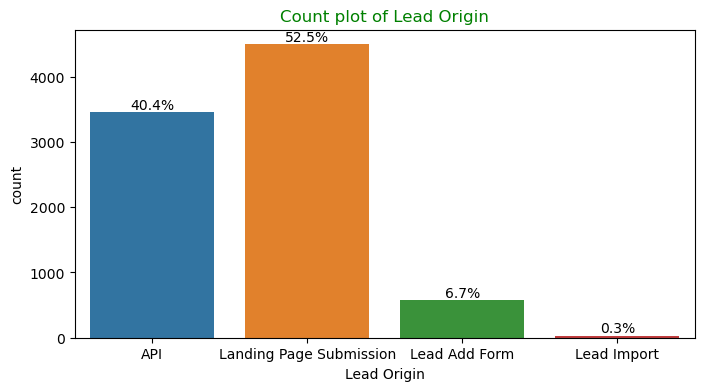

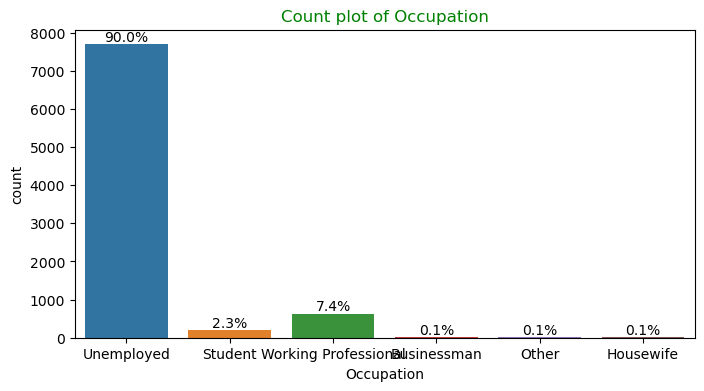

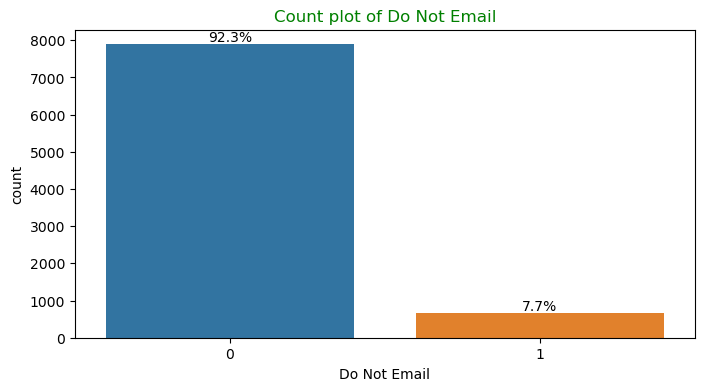

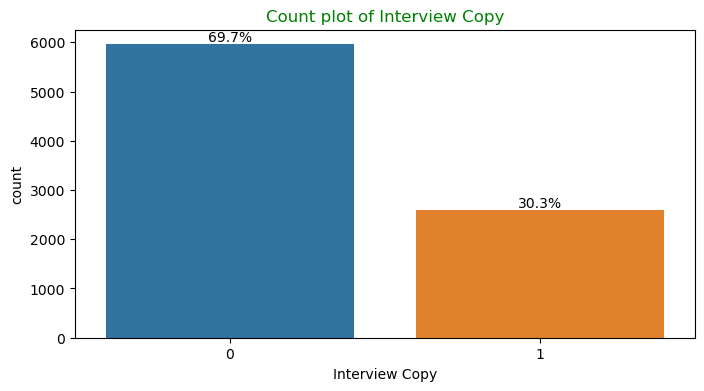

In [2564]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[8,4])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')  

Observation

In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

With this we get some understanding that which variables can be used in Bivariate analysis.

Insights Univariate:
Here is the list of features from variables which are present in majority (Converted and Not Converted included)

* Lead Origin: "Landing Page Submission" identified 52.5% customers, "API" identified 40.4%.

* Occupation: It has 90% of the customers as Unemployed

* Do Not Email: 92.3% of the people has opted that they dont want to be emailed about the course.

* Interview Copy:  69.7 % customers wants copy.


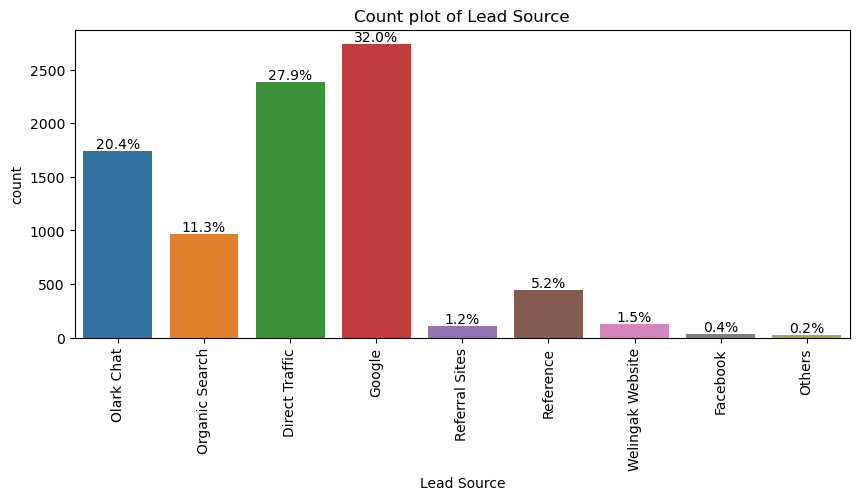

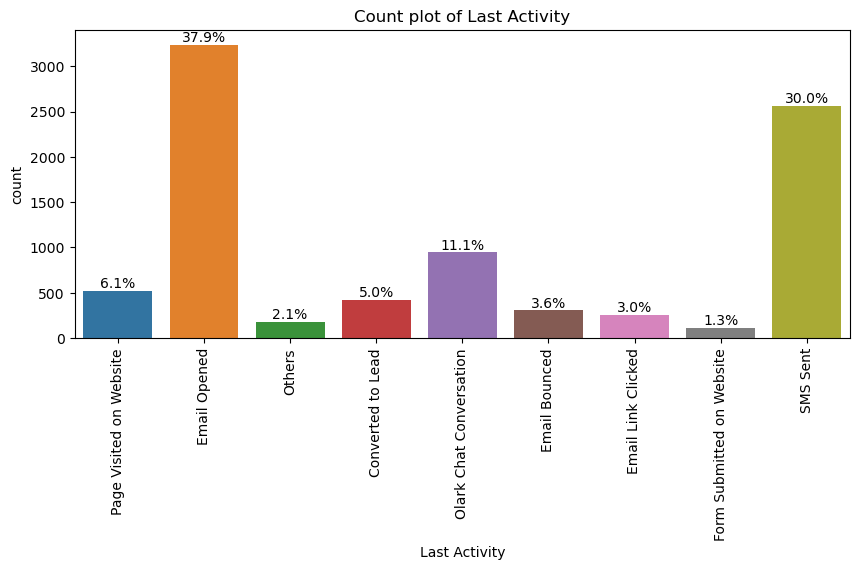

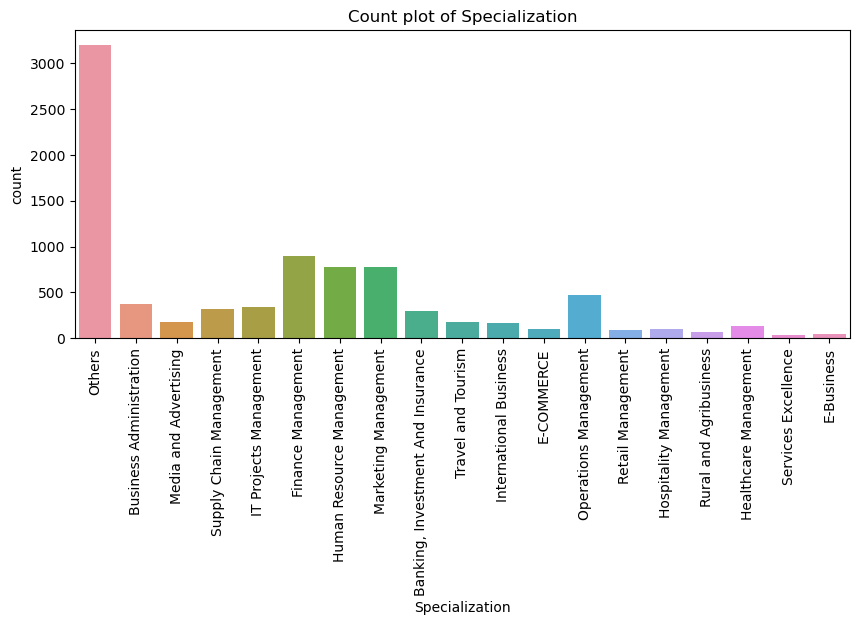

In [2565]:
# for Lead Source","Last Activity","Specialization"
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,4])
    plt.title("Count plot of {}".format(i))
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

* Lead Source: 58% Lead source is from Google & Direct Traffic combined


* Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

#### Bivariate Analysis

Analysis between 2 variables

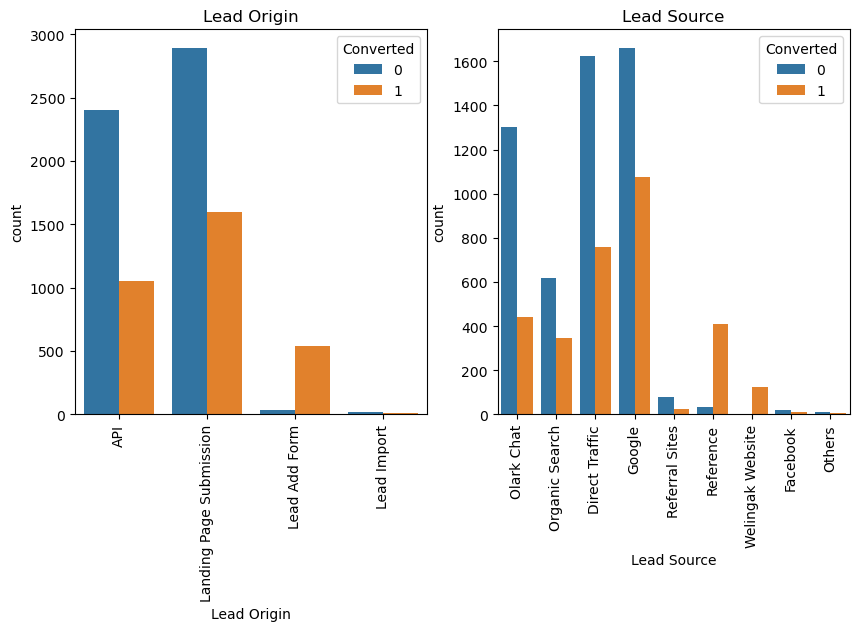

In [2566]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [2567]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=lead_df,palette="prism_r",alpha=0.46)
    
    total=len(lead_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

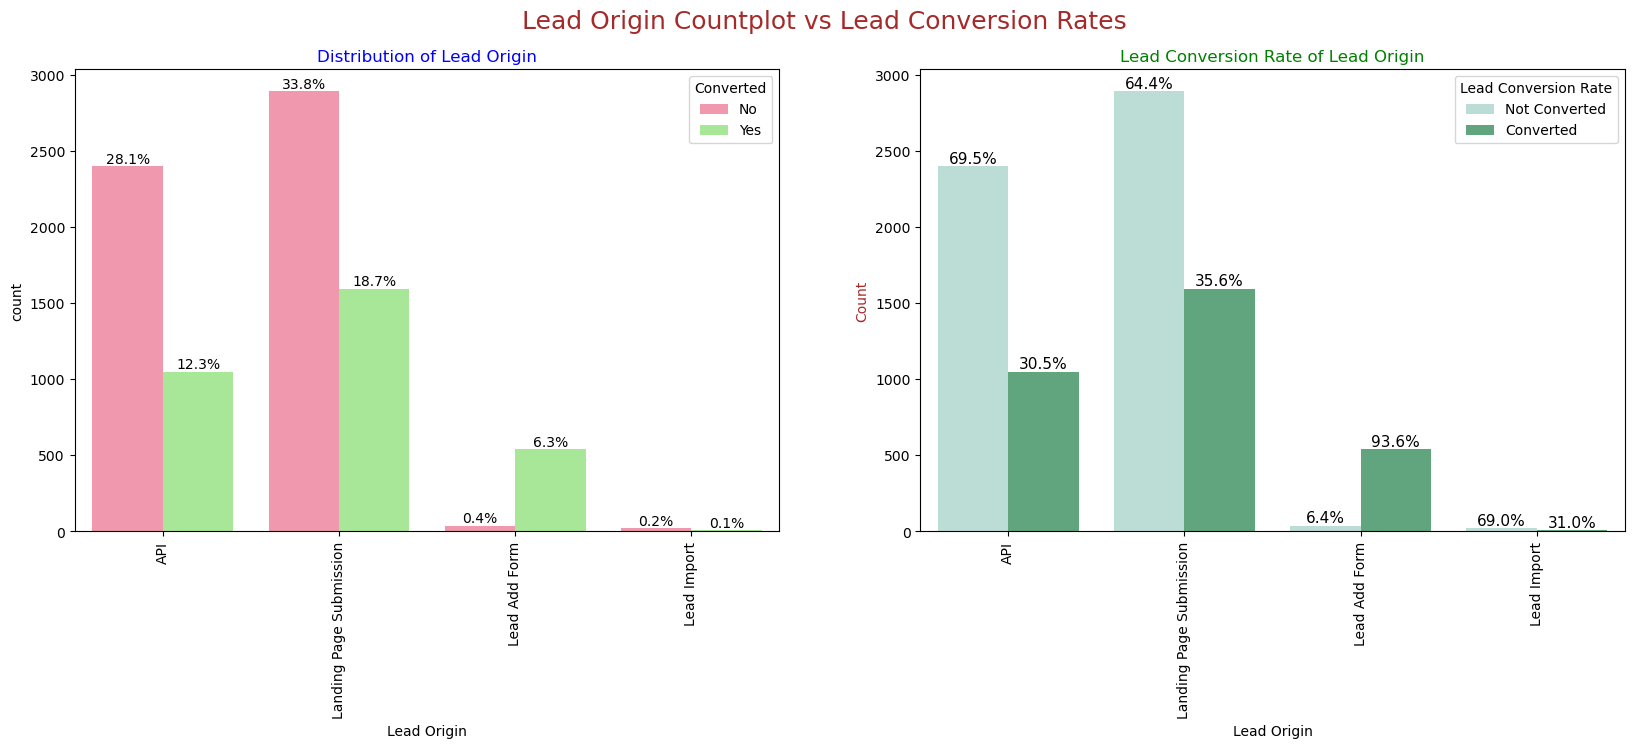

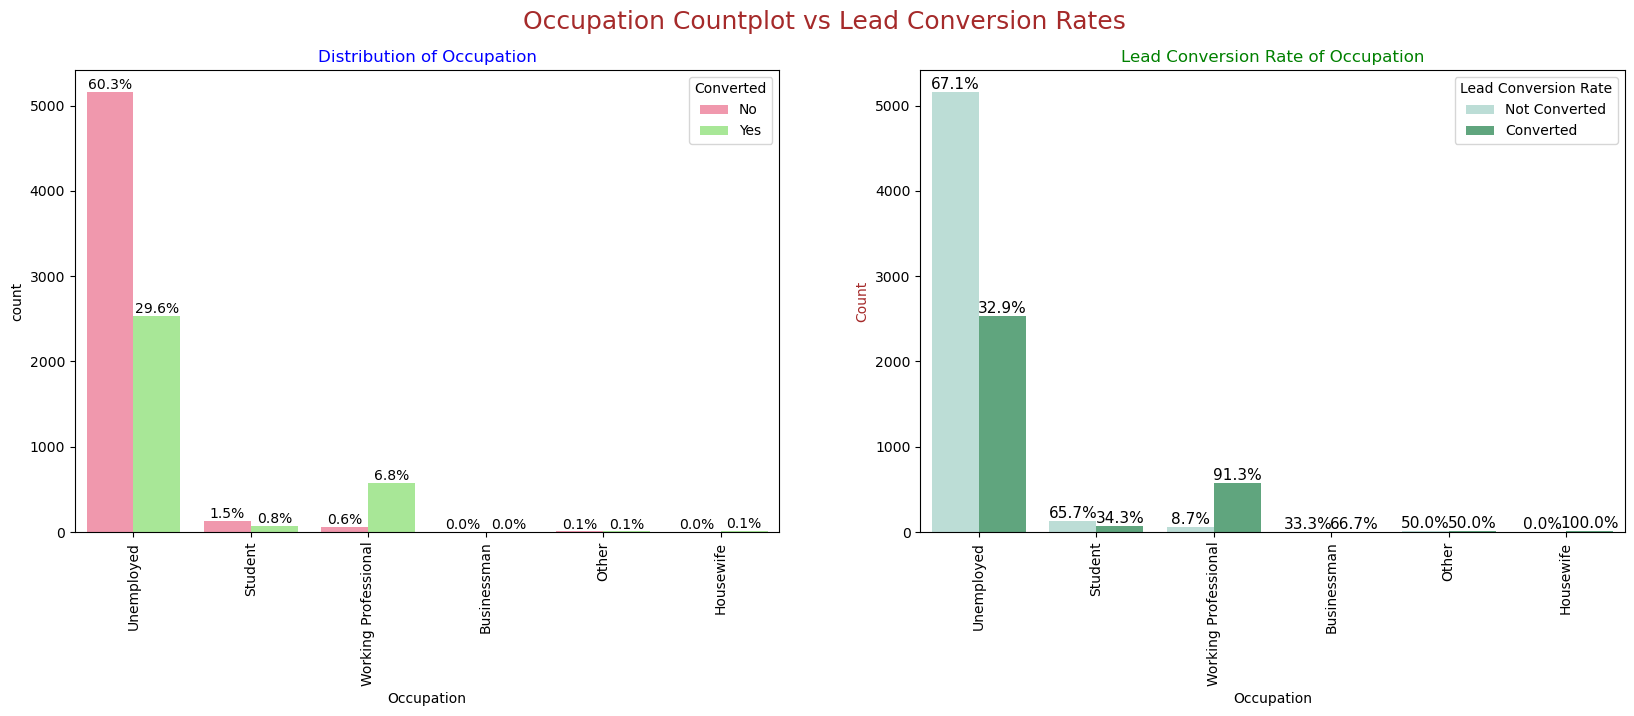

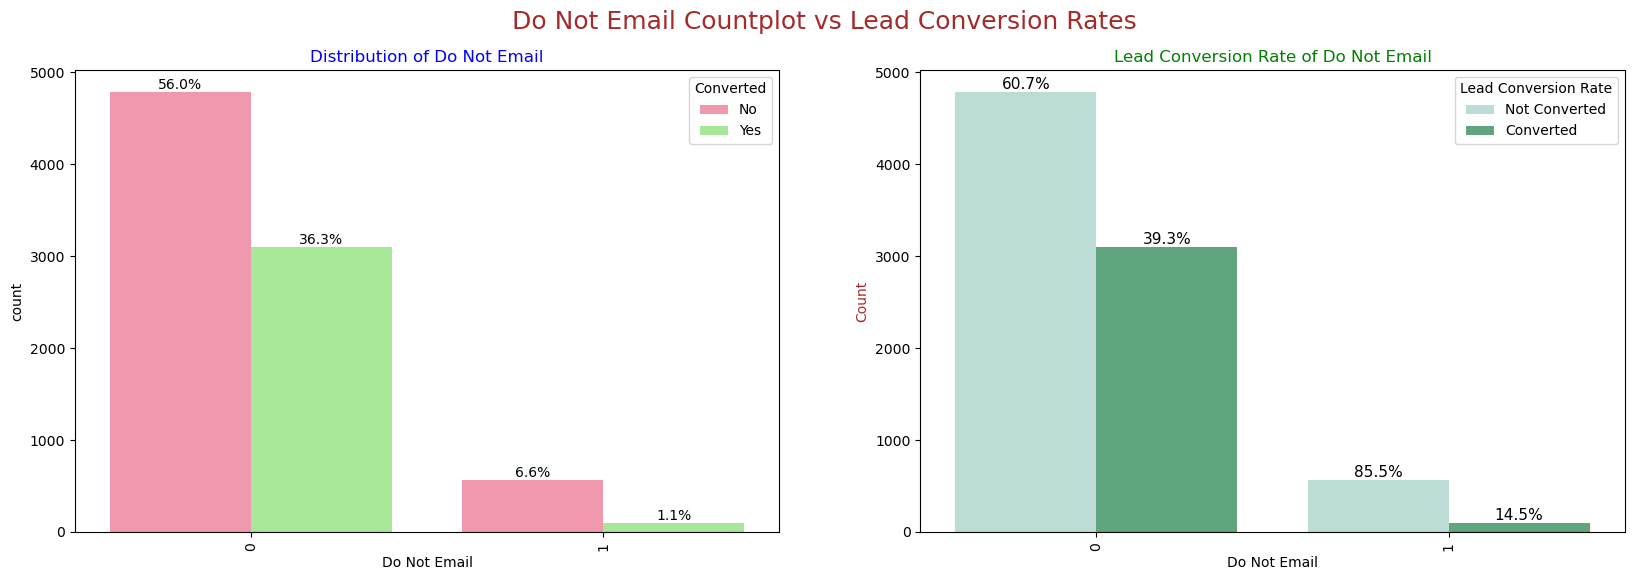

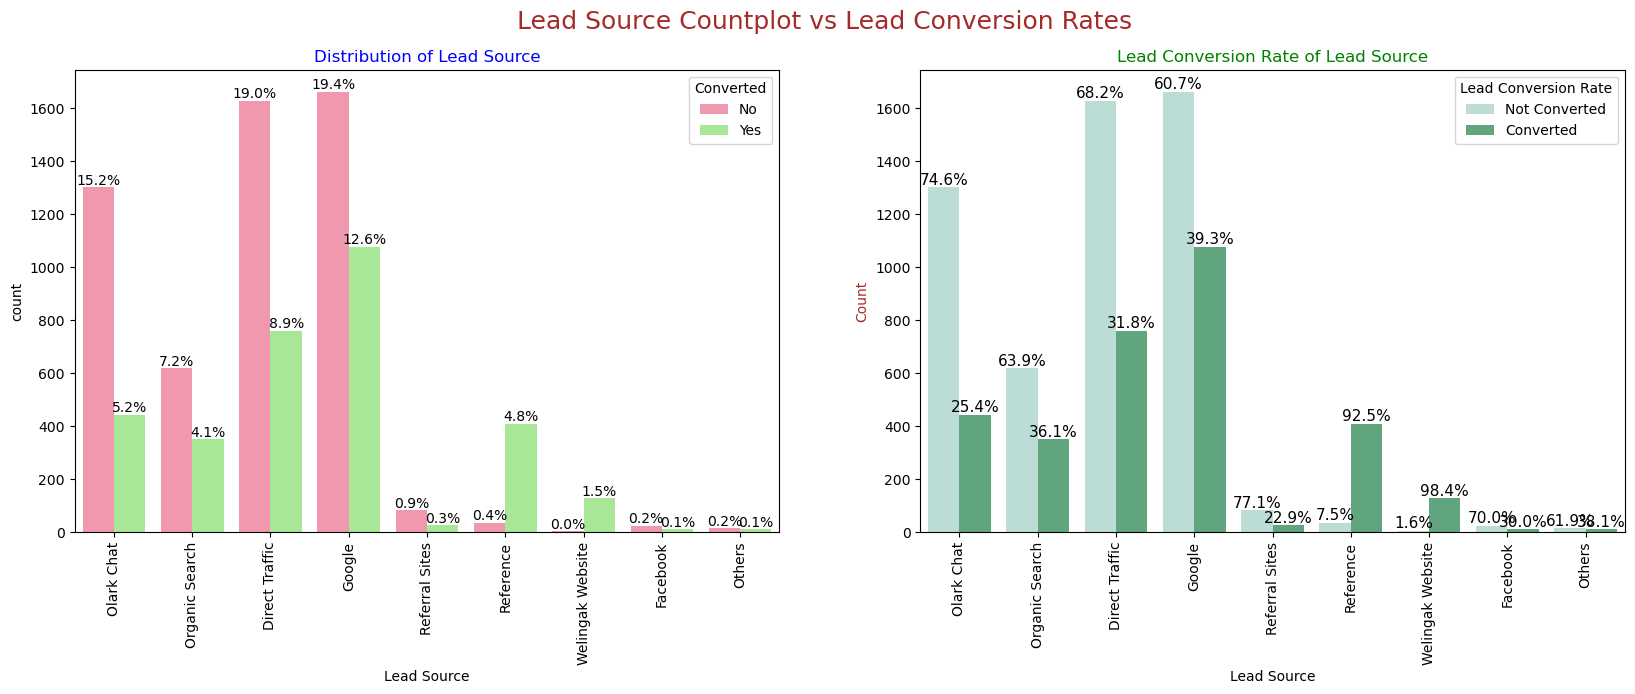

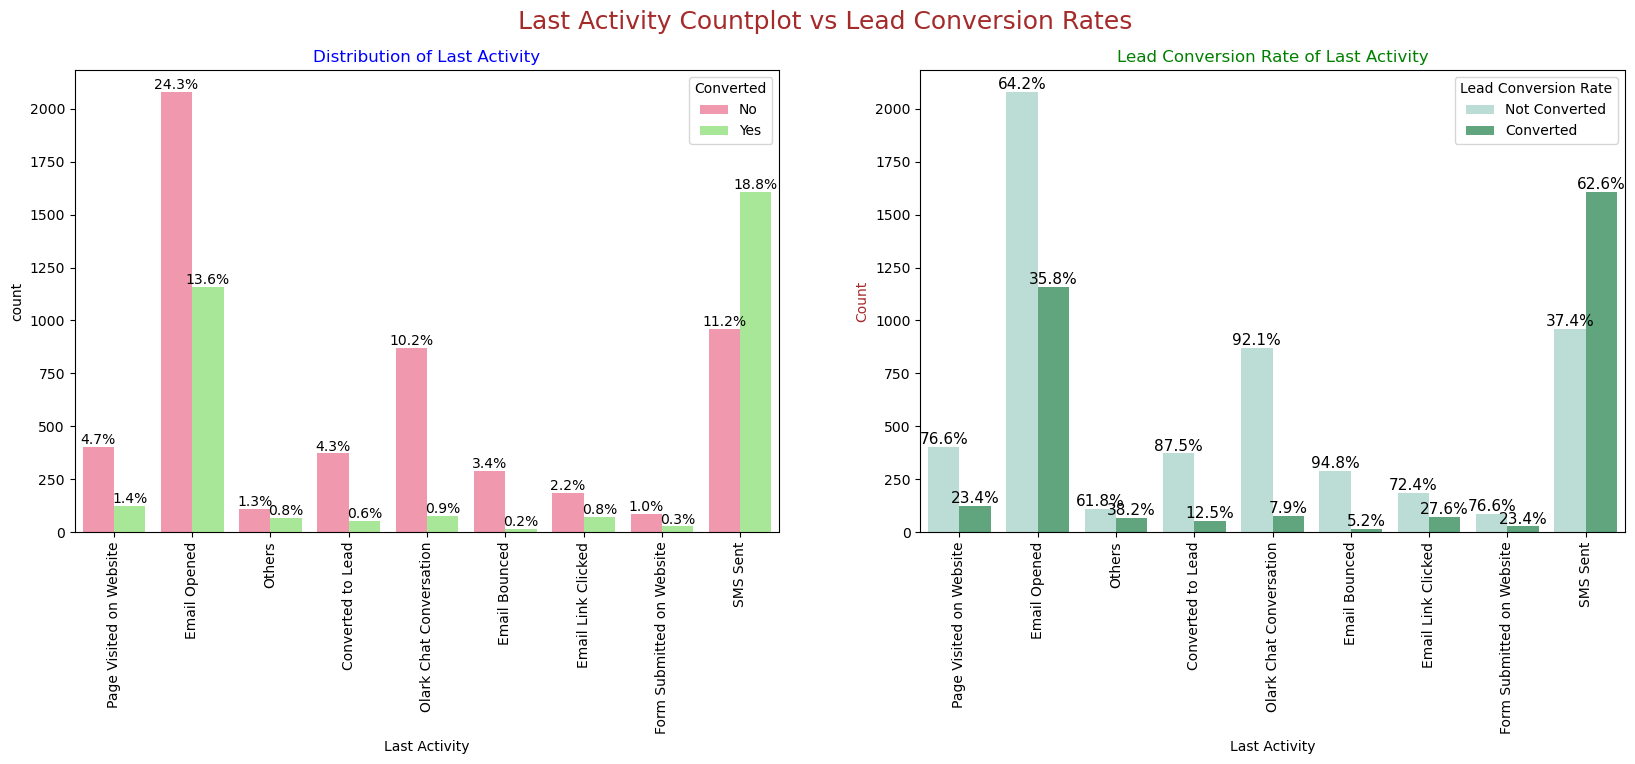

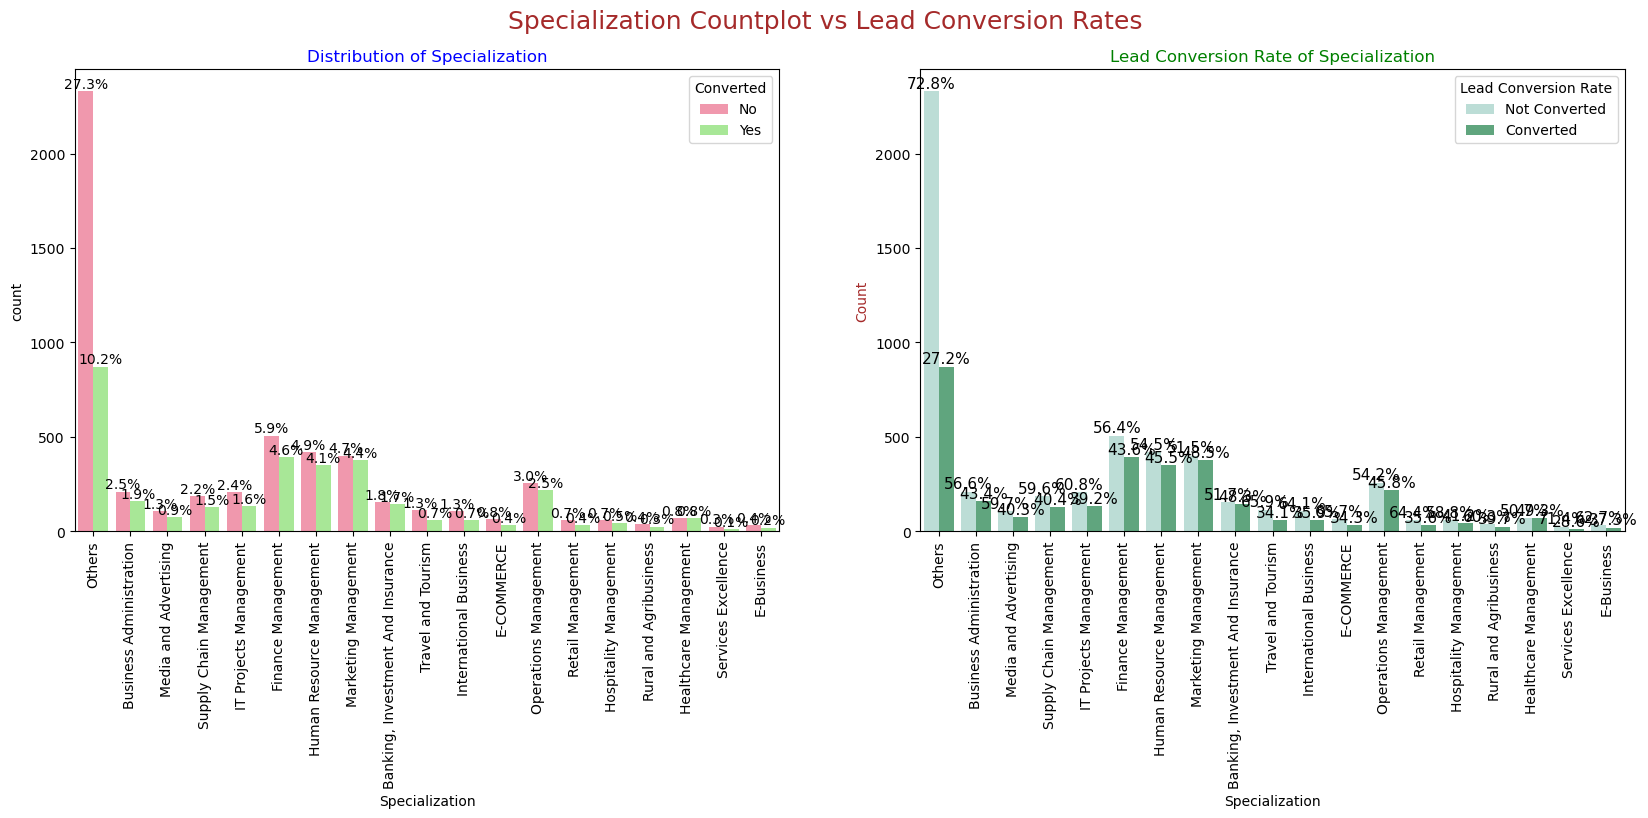

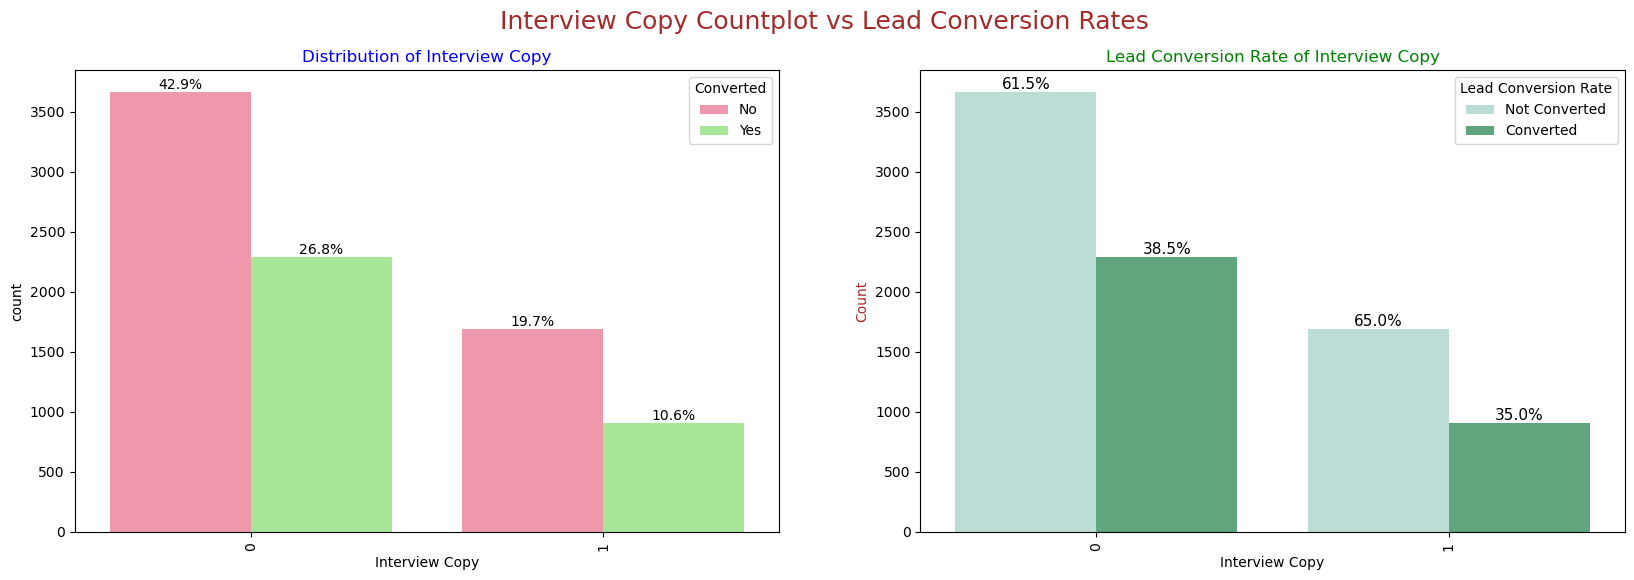

In [2568]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Interview Copy"]

for i in cat_cols:
    Bivariate_cat(lead_df,variable_name=i)
    

<Figure size 1600x400 with 0 Axes>

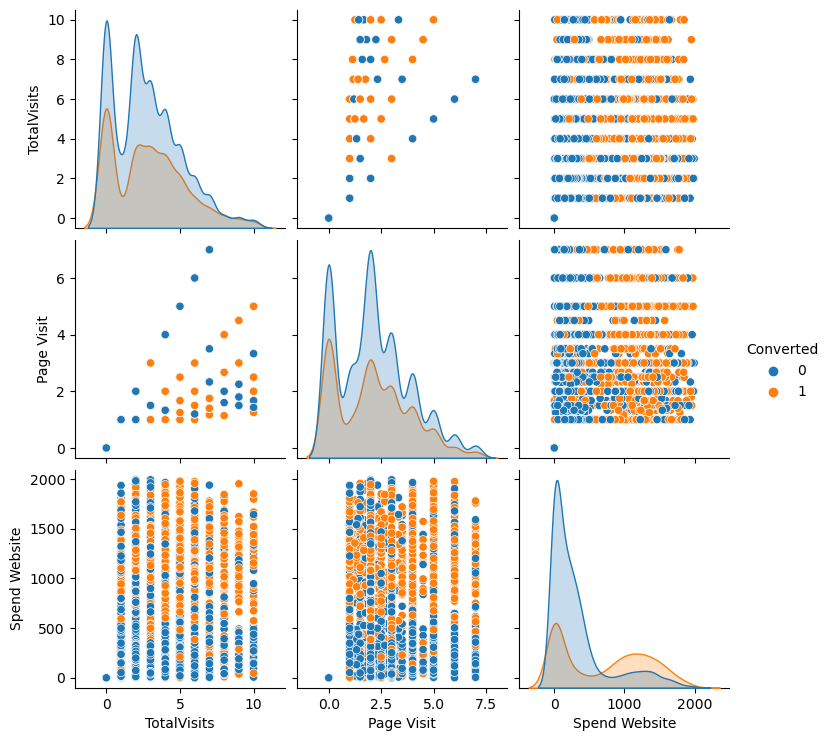

In [2569]:
num_cols = ["TotalVisits","Page Visit","Spend Website"]

plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_df,vars=num_cols,hue="Converted")                                  
plt.show()

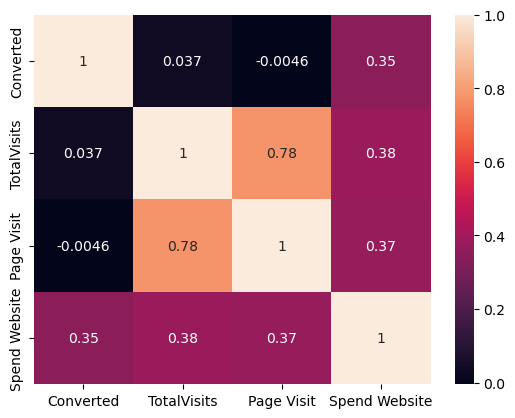

In [2570]:
num_cols = ["Converted","TotalVisits","Page Visit","Spend Website"]

# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead_df[num_cols].corr(),annot=True)
plt.show()

### Data Preparation

In [2571]:
lead_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Spend Website  Page Visit            Last Activity           Specialization  Occupation  Interview Copy
0                      API      Olark Chat             0          0          0.0              0         0.0  Page Visited on Website                   Others  Unemployed               0
1                      API  Organic Search             0          0          5.0            674         2.5             Email Opened                   Others  Unemployed               0
2  Landing Page Submission  Direct Traffic             0          1          2.0           1532         2.0             Email Opened  Business Administration     Student               1
3  Landing Page Submission  Direct Traffic             0          0          1.0            305         1.0                   Others    Media and Advertising  Unemployed               0
4  Landing Page Submission          Google             0          1          2.0           1428         1.0        Converted to Lead                   Others  Unemployed               0

In [2572]:
# creating dummy variable for categorical variables and dropping the first one.
lead_df = pd.get_dummies(data=lead_df,columns=["Lead Origin","Lead Source","Last Activity","Specialization","Occupation"], drop_first=True,dtype='int')


In [2573]:
# data shape
lead_df.shape

(8552, 48)

In [2574]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8552 non-null   int64  
 1   Converted                                 8552 non-null   int64  
 2   TotalVisits                               8552 non-null   float64
 3   Spend Website                             8552 non-null   int64  
 4   Page Visit                                8552 non-null   float64
 5   Interview Copy                            8552 non-null   int64  
 6   Lead Origin_Landing Page Submission       8552 non-null   int32  
 7   Lead Origin_Lead Add Form                 8552 non-null   int32  
 8   Lead Origin_Lead Import                   8552 non-null   int32  
 9   Lead Source_Facebook                      8552 non-null   int32  
 10  Lead Source_Google                       

### Split Data

In [2575]:
# split data in y an x
y = lead_df.pop('Converted')
x = lead_df

In [2576]:
# shape of x and y
print(y.shape)
print(x.shape)

(8552,)
(8552, 47)


In [2577]:
# split data in % 70:30.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=100)

In [2578]:
# after split
print(X_train.shape)
print(X_test.shape)

(5986, 47)
(2566, 47)


### Featuring Scaling

Using Standard scaler for scaling the features,
Good if we have some outliers.

In [2579]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
X_train.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  \
1374             0          6.0           1552         1.5               1                                    0                          0                        0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
2007             0          2.0            568         2.0               1                                    1                          0                        0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                                       0                          0                          1                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
3354             0          0.0              0         0.0               0                                    0                          0                        0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 1                           0                                        0                                      0                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
5635             0          0.0              0         0.0               0        

In [2638]:
# scaler for Standarize the data.
scaler = StandardScaler()
X_train[['TotalVisits','Spend Website','Page Visit']]=scaler.fit_transform(X_train[['TotalVisits','Spend Website','Page Visit']])
X_train.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  \
1374             0     1.354030       2.010683   -0.364032               1                                    0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
2007             0    -0.335878       0.187622   -0.075766               1                                    1                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                                       0                          0                          1                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
3354             0    -1.180832      -0.864714   -1.228830               0                                    0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 1                           0                                        0                                      0                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
5635             0    -1.180832      -0.864714   -1.228830               0                                    0                     0     

#### Conversion Rate

In [2581]:
# Conversion Rate
lcr = y.sum()/len(y)*100
lcr

37.40645463049579

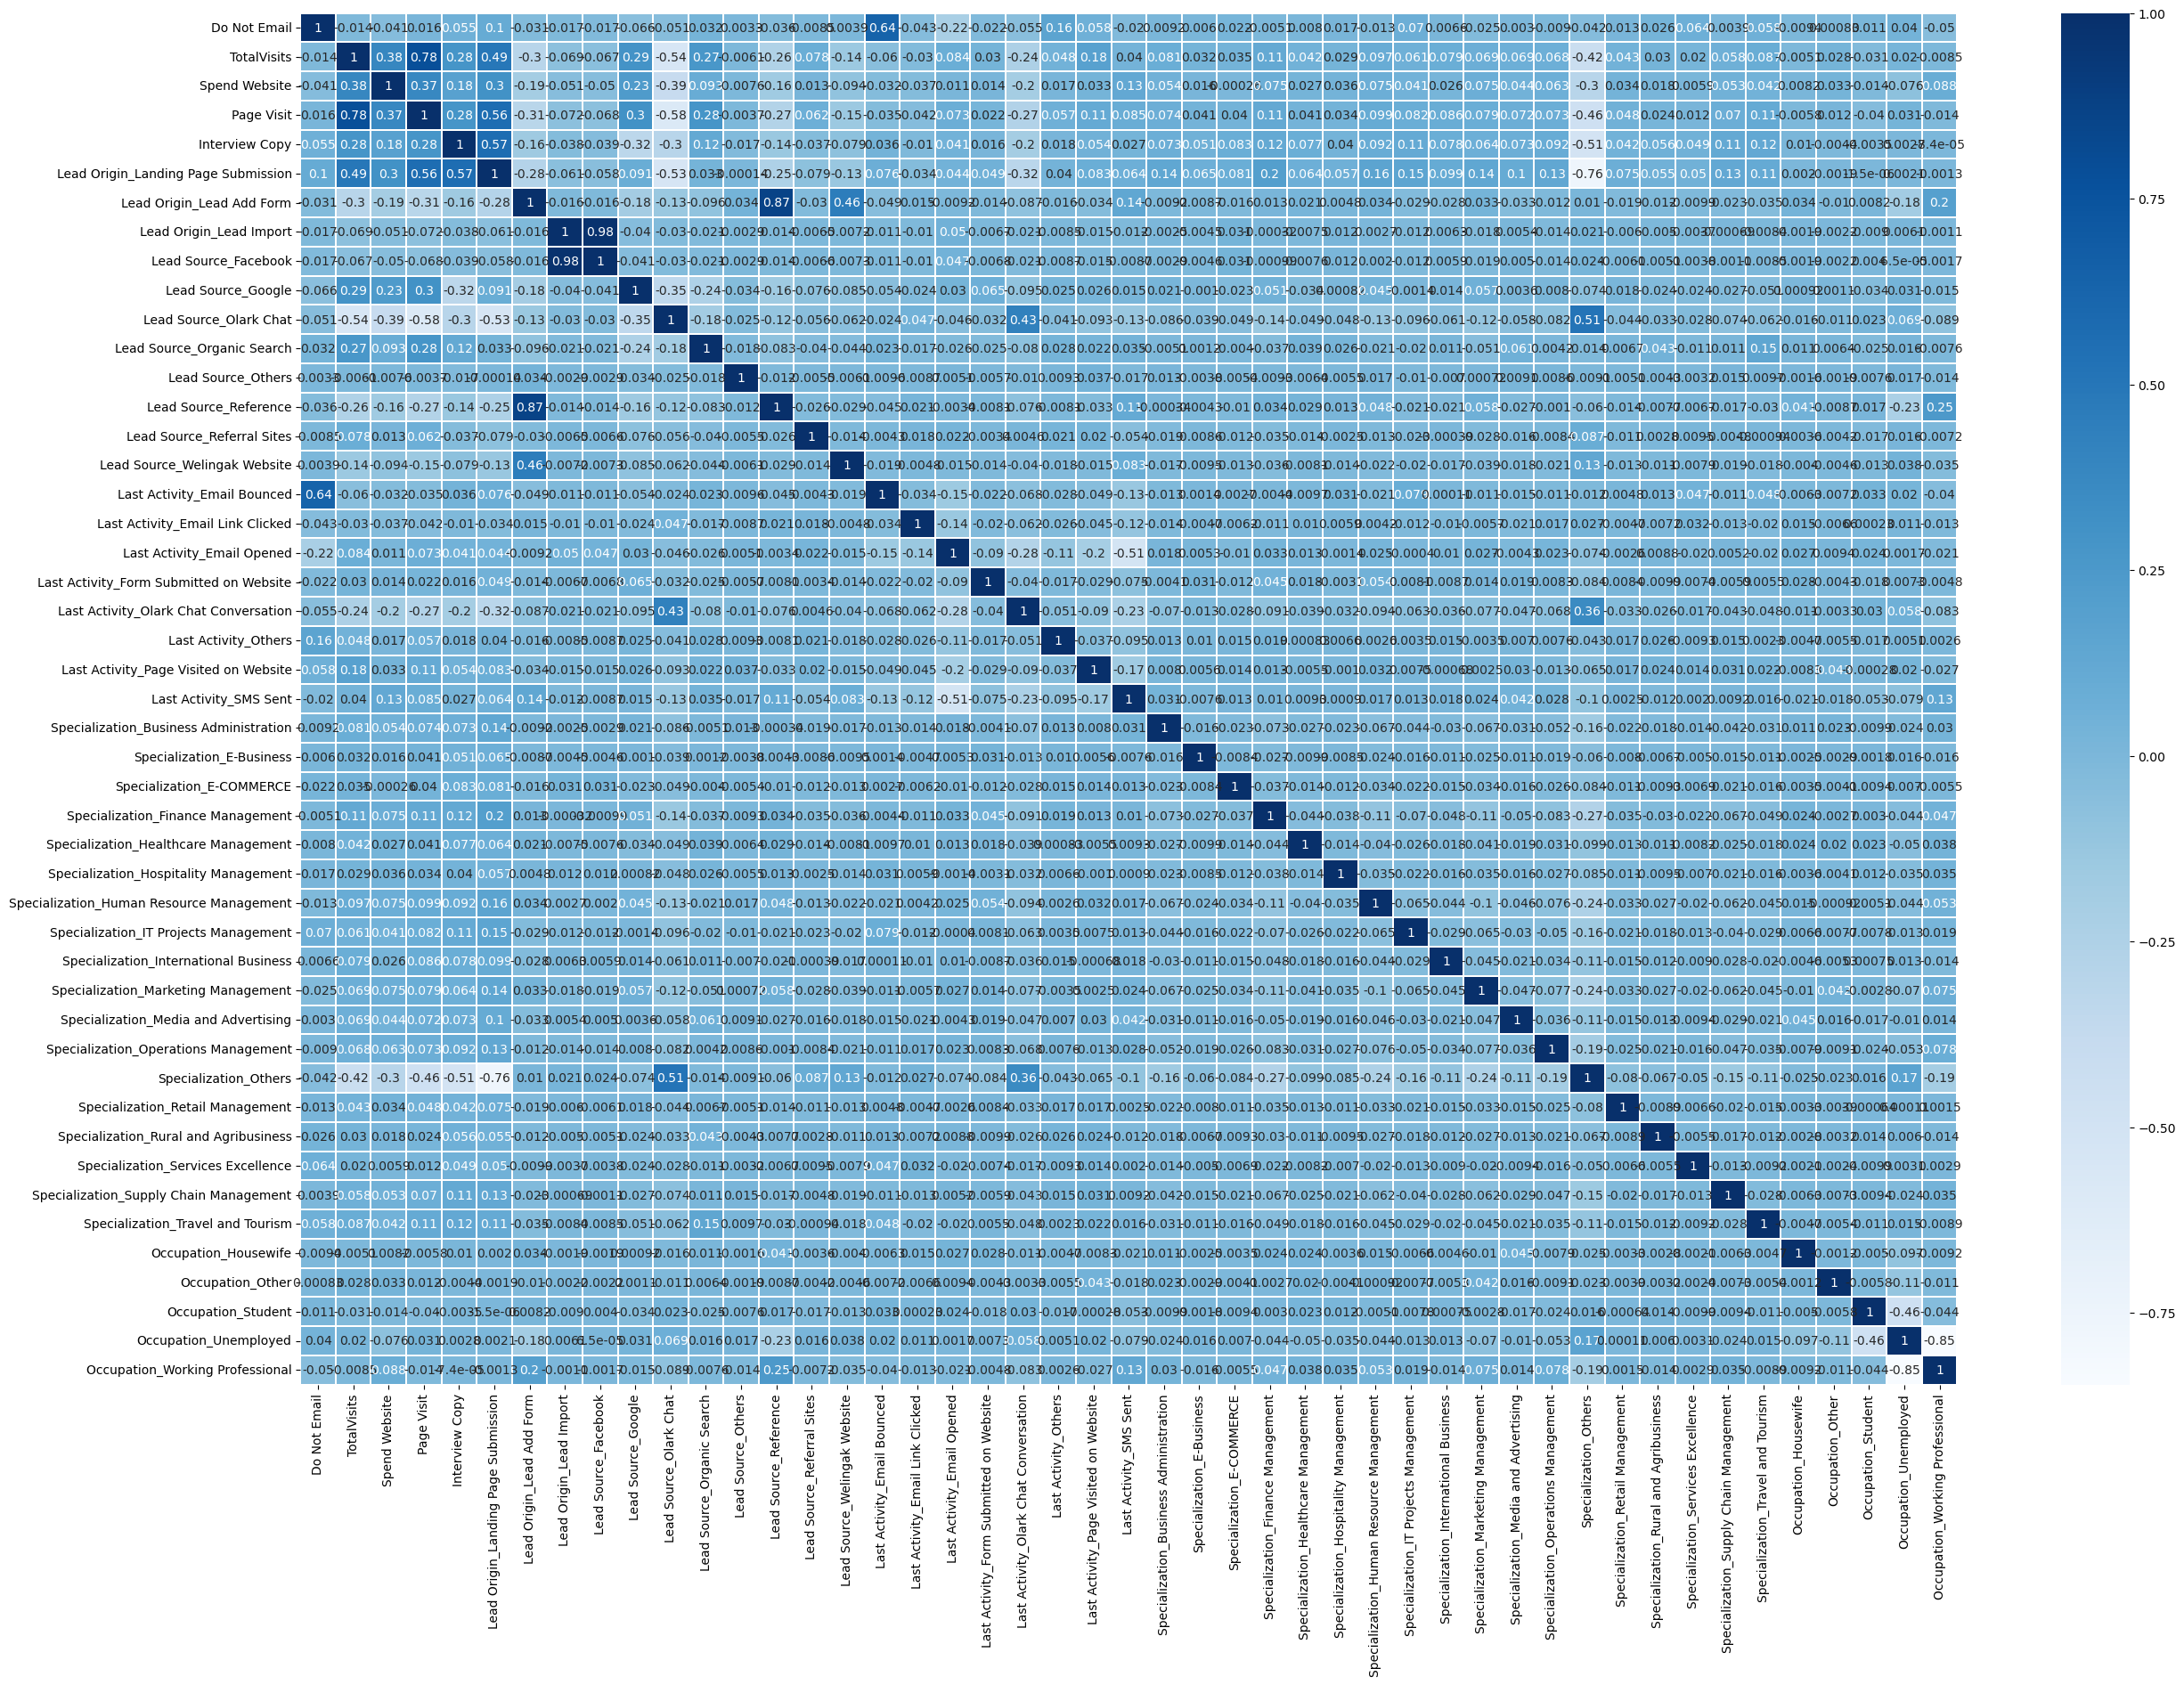

In [2582]:
# analyse correlation matrix
plt.figure(figsize = (30,20))        
sns.heatmap(lead_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

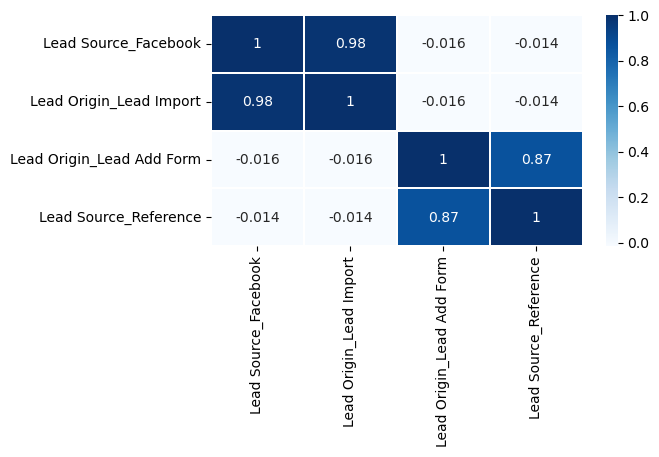

In [2583]:
# analyse correlation matrix
plt.figure(figsize = (6,3))        
sns.heatmap(lead_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

Observation:
    
High correlation between 2 columns so droping one.

In [2584]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

### Model Building

* We will Build Logistic Regression Model for predicting categorical variable
* Feature Selection Using RFE (Coarse tuning)
* Manual fine-tuning using p-values and VIFs

In [2585]:
# logistic Regression 
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [2586]:
# RFE
# Cut down number of features to 15 using automated approach
rfe = RFE(lg, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [2587]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 13),
 ('Spend Website', True, 1),
 ('Page Visit', False, 12),
 ('Interview Copy', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 30),
 ('Specialization_E-Business', False, 5),
 ('Specialization_

In [2588]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True])

In [2589]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
import statsmodels.api as sm

def build_model(cols):
    X_train_sm = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
    lm = X_train_sm.fit()
    
    
    print(lm.summary())
 
    return lm

In [2590]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [2591]:
X_train.columns[rfe.support_].shape

(15,)

In [2592]:
# selected columns
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Spend Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Others', 'Occupation_Housewife', 'Occupation_Working Professional'], dtype='object')

In [2593]:
# not selected columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Visit', 'Interview Copy', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'Occupation_Other', 'Occupation_Student',
       'Occupa

### Model Building

#### Buliding model 1

In [2594]:
#Selected columns for Model 1 - all columns selected by RFE
cols =['Spend Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 
       'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 
       'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 
       'Specialization_Others', 'Occupation_Housewife', 'Occupation_Working Professional']

build_model(cols)
get_vif(cols)
# Getting the predicted values on the train set


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5986
Model:                            GLM   Df Residuals:                     5970
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.2
Date:                Fri, 14 Jun 2024   Deviance:                       4998.5
Time:                        23:26:28   Pearson chi2:                 6.37e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

NOTE : "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

#### Building Model 2

In [2595]:
# remove Occupation_Housewife column 
cols =['Spend Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 
       'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 
       'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 
       'Specialization_Others', 'Occupation_Working Professional']

build_model(cols)
get_vif(cols)
# Getting the predicted values on the train set


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5986
Model:                            GLM   Df Residuals:                     5971
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.8
Date:                Fri, 14 Jun 2024   Deviance:                       5007.6
Time:                        23:26:28   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

NOTE : "Lead Source_Others" column will be removed from model due to high p-value of 0.079, which is above the accepted threshold of 0.05 for statistical significance.



#### Building Model 3

In [2596]:
# Dropping column "Lead Source_Others  " 
cols =['Spend Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 
       'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 
       'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 
       'Specialization_Others', 'Occupation_Working Professional']
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lm = logm2.fit()
print(lm.summary())
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5986
Model:                            GLM   Df Residuals:                     5972
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.3
Date:                Fri, 14 Jun 2024   Deviance:                       5010.5
Time:                        23:26:28   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Model Evaluation

* Confusion Matrix
* Accuracy
* Sensitivity and Specificity
* Threshold determination using ROC & Finding Optimal cutoff point
* Precision and Recall

In [2597]:
# Getting the predicted values on the train set
# now we are recalcuting y value with the exisiting x training variable. 
# now it is a new predict value
y_train_pred = lm.predict(X_train_sm)
y_train_pred[:10]

1374    0.864161
2007    0.490492
3354    0.156635
5635    0.051011
1400    0.536860
1474    0.572317
4215    0.150438
3877    0.031736
5432    0.471063
7789    0.884996
dtype: float64

In [2598]:
# reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86416077, 0.49049213, 0.15663473, 0.05101127, 0.53685957,
       0.57231678, 0.15043815, 0.0317358 , 0.47106271, 0.88499618])

In [2599]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          1        0.864161         1374
1          0        0.490492         2007
2          0        0.156635         3354
3          0        0.051011         5635
4          0        0.536860         1400

In [2600]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          1        0.864161         1374          1
1          0        0.490492         2007          0
2          0        0.156635         3354          0
3          0        0.051011         5635          0
4          0        0.536860         1400          1

### Confusion Matrix

In [2601]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3348  380]
 [ 782 1476]]


In [2602]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.805880387570999


#### Matrix beyond simply accuracy

In [2603]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2604]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6536758193091231

In [2605]:
# Let us calculate specificity
TN / float(TN+FP)

0.898068669527897

In [2606]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10193133047210301


In [2607]:
# positive predictive value 
print (TP / float(TP+FP))

0.7952586206896551


In [2608]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8106537530266343


### Plotinh ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [2609]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2610]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

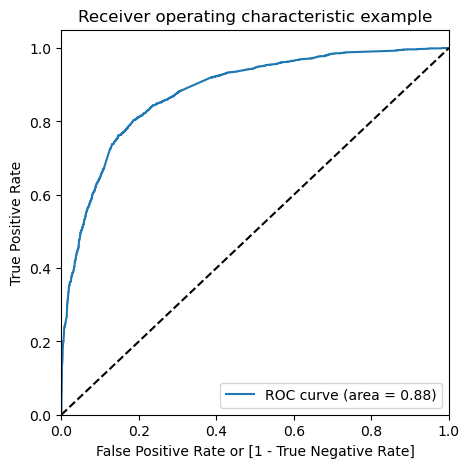

In [2611]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

NOTE: Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Finding Optimal Cutoff Point/ Probability
It is that probability where we get balanced sensitivity and specificity

In [2612]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          1        0.864161         1374          1    1    1    1    1    1    1    1    1    1    0
1          0        0.490492         2007          0    1    1    1    1    1    0    0    0    0    0
2          0        0.156635         3354          0    1    1    0    0    0    0    0    0    0    0
3          0        0.051011         5635          0    1    0    0    0    0    0    0    0    0    0
4          0        0.536860         1400          1    1    1    1    1    1    1    0    0    0    0

In [2613]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377213  1.000000  0.000000
0.1   0.1  0.588540  0.971656  0.356491
0.2   0.2  0.726027  0.921169  0.607833
0.3   0.3  0.795356  0.837024  0.770118
0.4   0.4  0.814901  0.767936  0.843348
0.5   0.5  0.805880  0.653676  0.898069
0.6   0.6  0.796191  0.586802  0.923015
0.7   0.7  0.780822  0.507086  0.946620
0.8   0.8  0.751754  0.393711  0.968616
0.9   0.9  0.708821  0.243136  0.990880


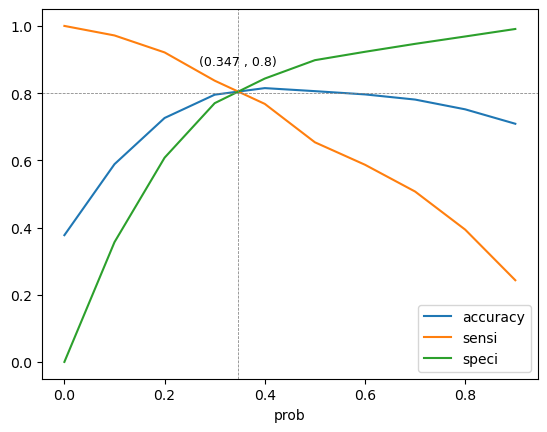

In [2614]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

NOTE: 0.347 is the approx. point where all the curves meet, so 0.347 seems to be our Optimal cutoff point for probability threshold .

Lets do mapping again using optimal cutoff point

In [2615]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.347 else 0)


In [2616]:
# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          1        0.864161         1374                1
1          0        0.490492         2007                1
2          0        0.156635         3354                0
3          0        0.051011         5635                0
4          0        0.536860         1400                1

#### Calculating all metrics using confusion matrix for Train

In [2617]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8080521216171066


In [2618]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [2619]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion_matrix)

[[3018  710]
 [ 439 1819]]


In [2620]:
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)


True Negative                    :  3018
True Positive                    :  1819
False Negative                   :  439
False Positve                    :  710
Model Accuracy                   :  0.8081
Model Sensitivity                :  0.8056
Model Specificity                :  0.8095
Model Precision                  :  0.7193
Model Recall                     :  0.8056
Model True Positive Rate (TPR)   :  0.8056
Model False Positive Rate (FPR)  :  0.1905


NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set

* Accuracy : 80.81%
* Sensitivity : 80.56%
* Specificity : 80.95%

#### Predict model in test data

In [2621]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2566 entries, 2329 to 7436
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2566 non-null   int64  
 1   TotalVisits                               2566 non-null   float64
 2   Spend Website                             2566 non-null   int64  
 3   Page Visit                                2566 non-null   float64
 4   Interview Copy                            2566 non-null   int64  
 5   Lead Origin_Landing Page Submission       2566 non-null   int32  
 6   Lead Source_Facebook                      2566 non-null   int32  
 7   Lead Source_Google                        2566 non-null   int32  
 8   Lead Source_Olark Chat                    2566 non-null   int32  
 9   Lead Source_Organic Search                2566 non-null   int32  
 10  Lead Source_Others                    

In [2622]:
X_test.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  \
2329             0          6.0           1395         6.0               1                                    1                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
6679             0          2.0            172         2.0               1                                    1                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
3726             0          0.0              0         0.0               0                                    0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      1                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
4588             0          0.0              0         0.0               0                                    0                     0     

In [2623]:
X_test['Do Not Email'].value_counts()

Do Not Email
0    2374
1     192
Name: count, dtype: int64

In [2624]:
# fetching int64 and float64 dtype columns from dataframe for scaling

# scaling columns
X_test[['TotalVisits','Spend Website','Page Visit']]= scaler.transform(X_test[['TotalVisits','Spend Website','Page Visit']])
X_test.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  \
2329             0     1.354030       1.719809    2.230363               1                                    1                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
6679             0    -0.335878      -0.546049   -0.075766               1                                    1                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
3726             0    -1.180832      -0.864714   -1.228830               0                                    0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      1                     0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
4588             0    -1.180832      -0.864714   -1.228830               0                                    0                     0     

In [2625]:
X_test = X_test[cols]
X_test.head()

Spend Website  Lead Origin_Landing Page Submission  Lead Source_Facebook  Lead Source_Olark Chat  Lead Source_Reference  Lead Source_Welingak Website  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Others  Occupation_Working Professional
2329       1.719809                                    1                     0                       0                      0                             0                                 0                           0                     0                                      0                       1                      0                                0
6679      -0.546049                                    1                     0                       0                      0                             0                                 0                           0                     0                                      0                       0                      0                                0
3726      -0.864714                                    0                     0                       1                      0                             0                                 0                           0                     0                                      0                       0                      1                                0
4588      -0.864714                                    0                     0                       1                      0                             0                                 0                           1                     0                                      0                       0                      1                                0
602       -0.864714                                    0                     1                       0                      0                             0                                 0                           1                     0                                      0                       0                      1                                0

In [2626]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
print(X_test_sm.shape)

(2566, 14)


In [2627]:
# making prediction using model 3 (final model)
y_test_pred = lm.predict(X_test_sm)

In [2628]:
# top 10 columns
y_test_pred[:10]

2329    0.827363
6679    0.026235
3726    0.051011
4588    0.219320
602     0.243373
3278    0.761236
7444    0.036870
2887    0.280793
2530    0.175525
3073    0.408814
dtype: float64

In [2629]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
2329  0.827363
6679  0.026235
3726  0.051011
4588  0.219320
602   0.243373

In [2630]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
2329          0
6679          0
3726          0
4588          0
602           0

In [2631]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          0         2329  0.827363
1          0         6679  0.026235
2          0         3726  0.051011
3          0         4588  0.219320
4          0          602  0.243373

In [2632]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         2329          0        0.827363
1         6679          0        0.026235
2         3726          0        0.051011
3         4588          0        0.219320
4          602          0        0.243373

In [2633]:
# taking sensitivity-specificity method at 0.347 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.347 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         2329          0        0.827363                1
1         6679          0        0.026235                0
2         3726          0        0.051011                0
3         4588          0        0.219320                0
4          602          0        0.243373                0

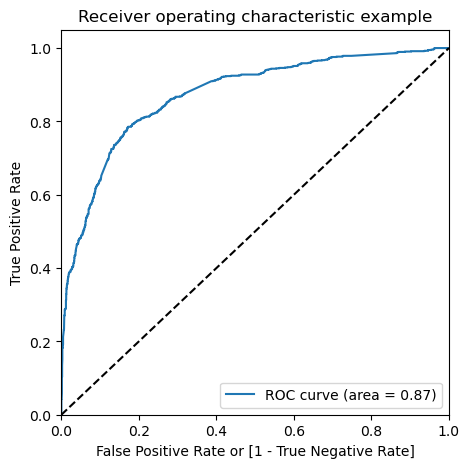

In [2634]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

#### Test Model Evaluation

In [2635]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix1 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix1,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix1)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1322  303]
 [ 194  747]] 

************************************************** 

True Negative                    :  1322
True Positive                    :  747
False Negative                   :  194
False Positve                    :  303
Model Accuracy                   :  0.8063
Model Sensitivity                :  0.7938
Model Specificity                :  0.8135
Model Precision                  :  0.7114
Model Recall                     :  0.7938
Model True Positive Rate (TPR)   :  0.7938
Model False Positive Rate (FPR)  :  0.1865


************************************************** 



NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set
* Accuracy : 80.63%
* Sensitivity : 79.38%
* Specificity : 81.35%

These matrics are very close to train set, so out final model logm4 is performing with good consistency on both Train & Test set

In [2636]:
# features and their coefficicent from final model
parameters=lm.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.482321
Lead Source_Reference                    3.234183
Last Activity_SMS Sent                   2.807472
Occupation_Working Professional          2.642245
Last Activity_Others                     1.913869
Last Activity_Email Opened               1.653716
Last Activity_Email Link Clicked         1.239867
Lead Source_Facebook                     1.140225
Spend Website                            1.047578
Lead Source_Olark Chat                   1.004864
Last Activity_Page Visited on Website    0.984431
Specialization_Others                   -1.112581
Lead Origin_Landing Page Submission     -1.132278
const                                   -1.909778
dtype: float64

#### Adding Lead Score Feature to Test dataframe

In [2637]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         2329          0        0.827363                1          83
1         6679          0        0.026235                0           3
2         3726          0        0.051011                0           5
3         4588          0        0.219320                0          22
4          602          0        0.243373                0          24

Lead Score: Lead Score is assigned to the customers

* The customers with a higher lead score have a higher conversion chance
* The customers with a lower lead score have a lower conversion chance.

Top 3 features that contributing positively to predicting hot leads in the model are:

* Lead Source_Welingak Website

* Lead Source_Reference

* Current_occupation_Working Professional